# 44688-Data Analytics Capstone Project

## FDIP (Fire Department Incident Prediction)

##### 03/13/23 - 04/28/23

##### Debra D. "DeeDee" Walker

##### Northwest Missouri State University, Maryville MO 64468, USA

In [1]:
#Import the pandas framework to import and work with the dataset
import pandas as pd

#Set pandas to show all rows and not truncate
pd.set_option('display.max_rows', None)

#Import datetime so we can work with dates and times
import datetime as dt

#Import numpy
import numpy as np

#import os module
import os as os

#for use with cartesian product
from itertools import product

#import stats package
import scipy.stats as ss

#graphic imports
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import seaborn as sns

#Original data was accessed through the csv file download due to the limitations of the API on the site for this large dataset. The API endpoint limits hits and requires data to be requested by page
# Data was pulled from https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd on March 16, 2023 then cleaned for use.
#Use the function read_csv from pandas and create a dataframe assigned to variable df
df = pd.read_csv('fdip_clean.csv', sep=',')

#convert INCIDENT_DATE_TIME from object to datetime format
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], infer_datetime_format = True)

In [2]:
df.head(n=10)

IM_INCIDENT_KEY  INCIDENT_DATE_TIME  UNITS_ONSCENE  \
0         63583742 2018-07-21 12:18:19              1   
1         63583743 2018-07-21 12:18:26              1   
2         63584267 2018-07-21 14:16:40              2   
3         63584484 2018-07-21 15:07:51              1   
4         63584485 2018-07-21 15:08:36              1   
5         63584710 2018-07-21 16:03:49              1   
6         63584716 2018-07-21 16:06:01              1   
7         63584720 2018-07-21 16:05:50              1   
8         63584722 2018-07-21 16:06:40              1   
9         63584727 2018-07-21 16:08:38              1   

   TOTAL_INCIDENT_DURATION  ZIP_CODE  BOROUGH_DESC  \
0                     0.66     10475     2 - Bronx   
1                     0.12     11230  4 - Brooklyn   
2                     0.02     11204  4 - Brooklyn   
3                     0.37     11235  4 - Brooklyn   
4                     0.32     11208  4 - Brooklyn   
5                     0.44     11693    5 - Queens   
6                     1.77     10464     2 - Bronx   
7                     0.19     10451     2 - Bronx   
8                     0.39     10468     2 - Bronx   
9                     0.26     11357    5 - Queens   

             INCIDENT_CATEGORY  INCIDENT_CATNUM  LEVEL_CATEGORY  BOROUGH_NUM  \
0                 RESCUE & EMS                3               1            2   
1                 RESCUE & EMS                3               1            4   
2  HAZARDOUS CONDITION-NO FIRE                4               1            4   
3                 SERVICE CALL                5               1            4   
4                 RESCUE & EMS                3               1            4   
5                 SERVICE CALL                5               1            5   
6                 RESCUE & EMS                3               1            2   
7                 SERVICE CALL                5               1            2   
8                 RESCUE & EMS                3               1            2   
9                 RESCUE & EMS                3               1            5   

  Day_of_week  Hour_of_day  MONTH  DAY_NUM INCIDENT_LENGTH UNITS_CATEGORY  
0    Saturday           12      7        6     30min-45min              1  
1    Saturday           12      7        6         <=15min              1  
2    Saturday           14      7        6         <=15min              2  
3    Saturday           15      7        6     15min-30min              1  
4    Saturday           15      7        6     15min-30min              1  
5    Saturday           16      7        6     15min-30min              1  
6    Saturday           16      7        6           1-2hr              1  
7    Saturday           16      7        6         <=15min              1  
8    Saturday           16      7        6     15min-30min              1  
9    Saturday           16      7        6     15min-30min              1

In [3]:
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2340417].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  int64         
 1   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 2   UNITS_ONSCENE            1600000 non-null  int64         
 3   TOTAL_INCIDENT_DURATION  1600000 non-null  float64       
 4   ZIP_CODE                 1600000 non-null  int64         
 5   BOROUGH_DESC             1600000 non-null  object        
 6   INCIDENT_CATEGORY        1600000 non-null  object        
 7   INCIDENT_CATNUM          1600000 non-null  int64         
 8   LEVEL_CATEGORY           1600000 non-null  int64         
 9   BOROUGH_NUM              1600000 non-null  int64         
 10  Day_of_week              1600000 non-null  object        
 11  Hour_of_day              1600000 non-null  int64         
 12  

In [4]:
df.describe()

IM_INCIDENT_KEY  UNITS_ONSCENE  TOTAL_INCIDENT_DURATION      ZIP_CODE  \
count     2.340414e+06   2.340414e+06             2.340414e+06  2.340414e+06   
mean      6.518737e+07   1.934347e+00             4.019099e-01  1.075483e+04   
std       2.518245e+06   1.752352e+00             7.275382e-01  5.512771e+02   
min       6.084081e+07   1.000000e+00             0.000000e+00  7.735000e+03   
25%       6.301218e+07   1.000000e+00             2.100000e-01  1.030200e+04   
50%       6.516578e+07   1.000000e+00             2.900000e-01  1.047500e+04   
75%       6.736267e+07   2.000000e+00             4.400000e-01  1.122800e+04   
max       6.950386e+07   1.360000e+02             1.404800e+02  1.169700e+04   

       INCIDENT_CATNUM  LEVEL_CATEGORY   BOROUGH_NUM   Hour_of_day  \
count     2.340414e+06    2.340414e+06  2.340414e+06  2.340414e+06   
mean      4.033446e+00    1.021416e+00  3.005651e+00  1.323228e+01   
std       1.751323e+00    3.764913e-01  1.511746e+00  6.278277e+00   
min       1.000000e+00    0.000000e+00  1.000000e+00  0.000000e+00   
25%       3.000000e+00    1.000000e+00  2.000000e+00  9.000000e+00   
50%       3.000000e+00    1.000000e+00  3.000000e+00  1.400000e+01   
75%       5.000000e+00    1.000000e+00  4.000000e+00  1.800000e+01   
max       8.000000e+00    7.000000e+00  5.000000e+00  2.300000e+01   

              MONTH       DAY_NUM  
count  2.340414e+06  2.340414e+06  
mean   6.590438e+00  3.992899e+00  
std    3.438687e+00  1.990724e+00  
min    1.000000e+00  1.000000e+00  
25%    4.000000e+00  2.000000e+00  
50%    7.000000e+00  4.000000e+00  
75%    1.000000e+01  6.000000e+00  
max    1.200000e+01  7.000000e+00

In [5]:
df.shape

(2340414, 16)

In [6]:
df.nunique()

IM_INCIDENT_KEY            2340414
INCIDENT_DATE_TIME         2319890
UNITS_ONSCENE                   91
TOTAL_INCIDENT_DURATION       1850
ZIP_CODE                       179
BOROUGH_DESC                     5
INCIDENT_CATEGORY                8
INCIDENT_CATNUM                  8
LEVEL_CATEGORY                   8
BOROUGH_NUM                      5
Day_of_week                      7
Hour_of_day                     24
MONTH                           12
DAY_NUM                          7
INCIDENT_LENGTH                  7
UNITS_CATEGORY                   7
dtype: int64

In [7]:
#date Range
print (df['INCIDENT_DATE_TIME'].min())
print (df['INCIDENT_DATE_TIME'].max())

2017-01-01 00:00:22
2021-12-31 23:59:24


## Look at Borough data

In [8]:
df.BOROUGH_DESC.value_counts()

4 - Brooklyn         685610
1 - Manhattan        568009
2 - Bronx            487961
5 - Queens           475797
3 - Staten Island    123037
Name: BOROUGH_DESC, dtype: int64

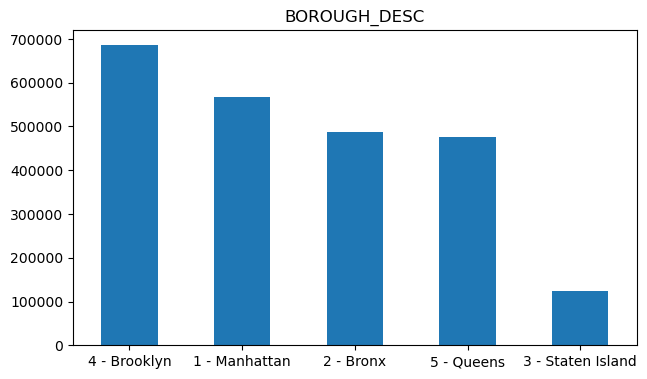

In [9]:
#Visual showing Brooklyn has the highest # of incidents
plt.subplot(221)
df['BOROUGH_DESC'].value_counts().plot(kind='bar', title='BOROUGH_DESC', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

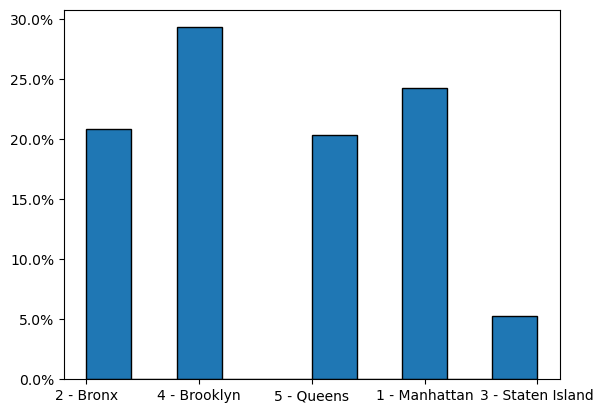

In [10]:
#Displays in relative frequency
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['BOROUGH_DESC'], edgecolor='black',weights=np.ones_like(df['BOROUGH_DESC'])*100/len(df['BOROUGH_DESC']))
ax.yaxis.set_major_formatter(PercentFormatter())

## Look at Level Catergory data

In [11]:
df.LEVEL_CATEGORY.value_counts()

1    2325238
7       9032
0       5299
2        598
3        150
4         60
5         33
6          4
Name: LEVEL_CATEGORY, dtype: int64

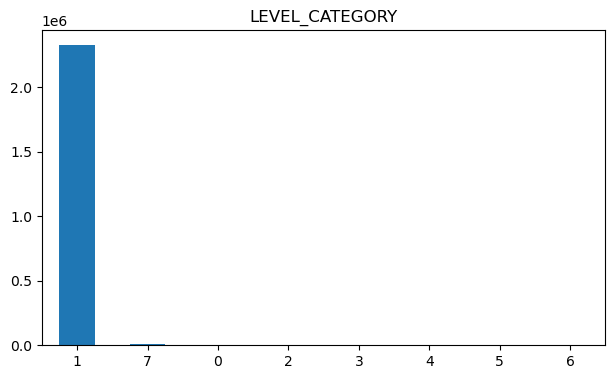

In [12]:
#Visual showing that the majority of calls are a level 1 which is 
#'More than initial alarm, less than Signal 7-5 (all hands on deck)' or 'First alarm'
#The 2nd highest is level 7 which includes 'all hands on deck'
#Each level adds another department and necessary equipment
plt.subplot(221)
df['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

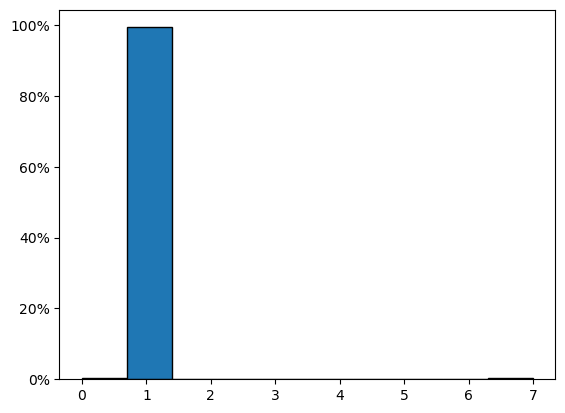

In [13]:
#Displays in relative frequency
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['LEVEL_CATEGORY'], edgecolor='black',weights=np.ones_like(df['LEVEL_CATEGORY'])*100/len(df['LEVEL_CATEGORY']))
ax.yaxis.set_major_formatter(PercentFormatter())

<AxesSubplot: title={'center': 'LEVEL_CATEGORY'}, xlabel='BOROUGH_DESC'>

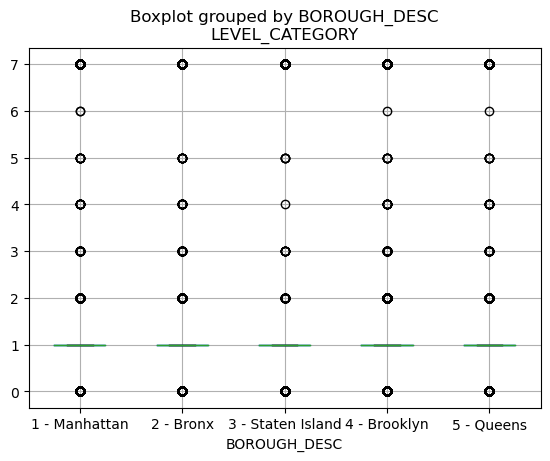

In [14]:
df.boxplot(column=['LEVEL_CATEGORY'], by='BOROUGH_DESC')

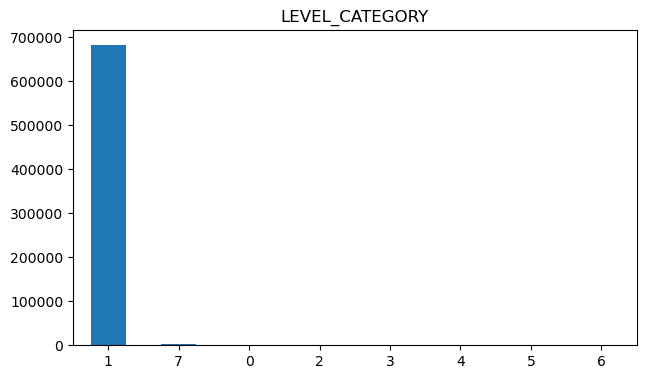

In [15]:
#Check level category for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

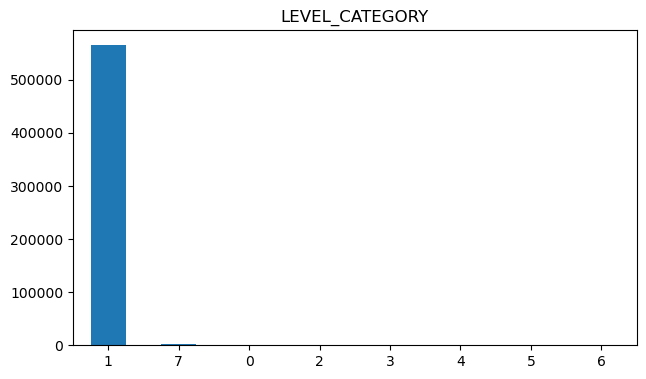

In [16]:
#Check level category for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

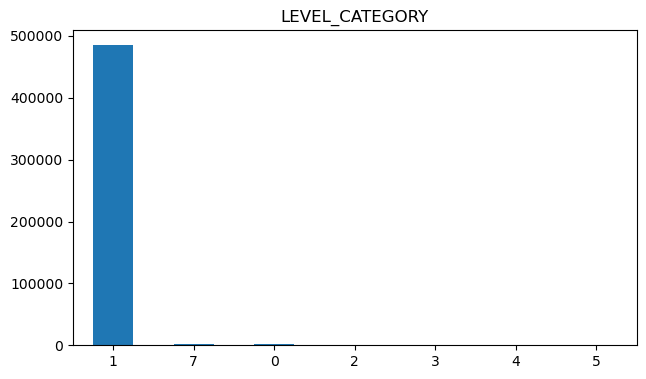

In [17]:
#Check level category for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

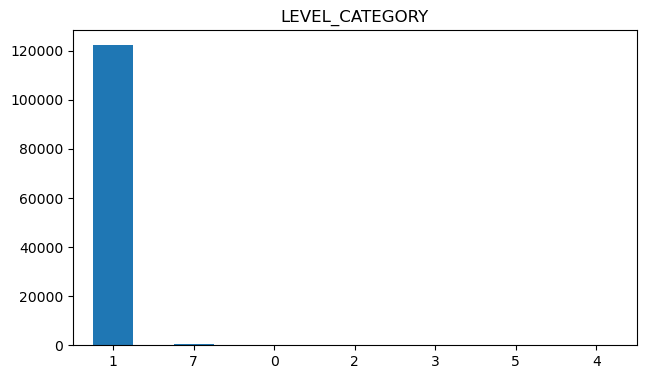

In [18]:
#Check level category for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

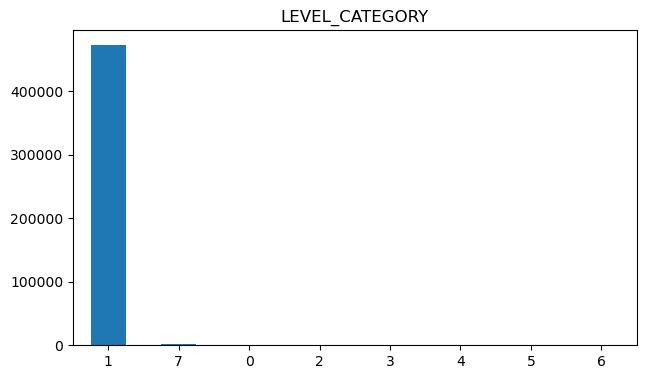

In [19]:
#Check level category for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

## Look at Hour of the day

In [20]:
df.Hour_of_day.value_counts()

17    138404
18    136788
16    131775
19    131512
15    129412
14    127952
13    124016
20    122886
12    120131
11    116026
21    113171
10    110828
9     104659
22    101506
8      92028
23     91453
0      76619
7      72991
1      61826
6      55017
2      50794
5      44229
3      44188
4      42203
Name: Hour_of_day, dtype: int64

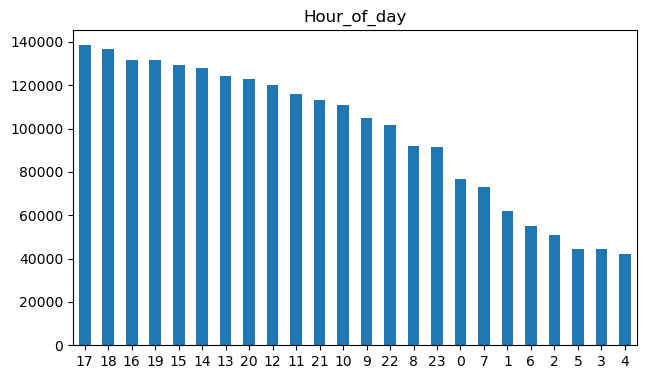

In [21]:
# This shows us that as the day prgresses it gets busier with the busiest block of time being between 1600 - 1800
# or if looking ata larger block between 1400 - 1900.
plt.subplot(221)
df['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

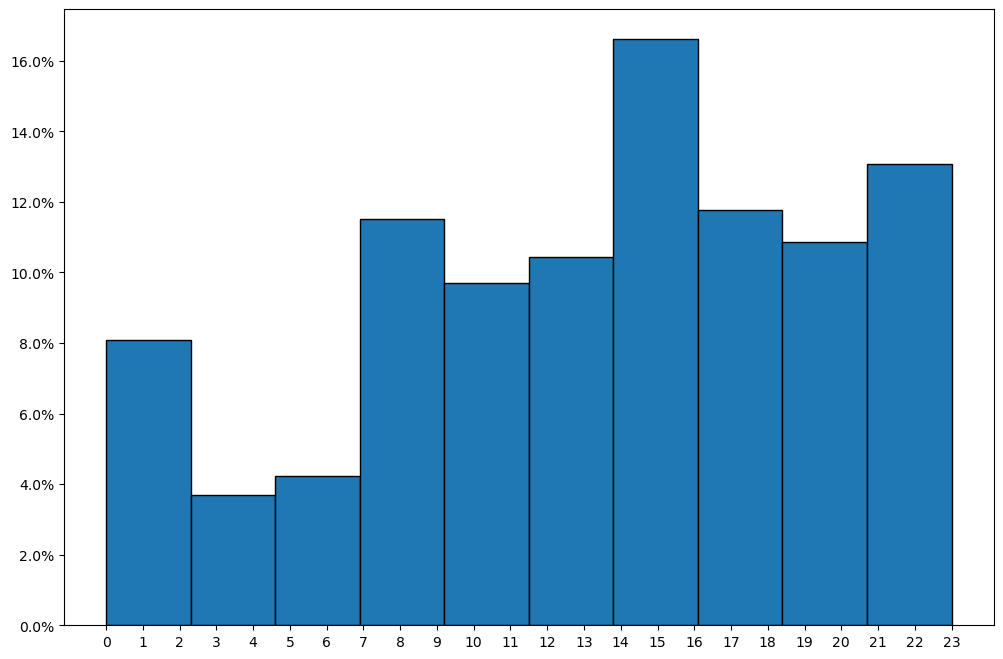

In [22]:
#Displays in relative frequency
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(df['Hour_of_day'], edgecolor='black',weights=np.ones_like(df['Hour_of_day'])*100/len(df['Hour_of_day']))
ax.xaxis.set_ticks(np.arange(0, 24, 1))
ax.yaxis.set_major_formatter(PercentFormatter())

<AxesSubplot: title={'center': 'Hour_of_day'}, xlabel='BOROUGH_DESC'>

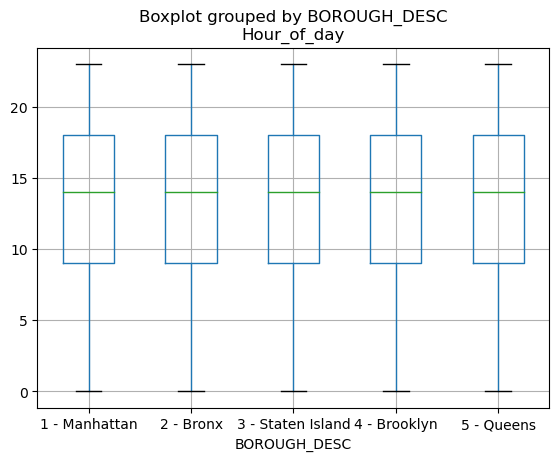

In [23]:
df.boxplot(column=['Hour_of_day'], by='BOROUGH_DESC')

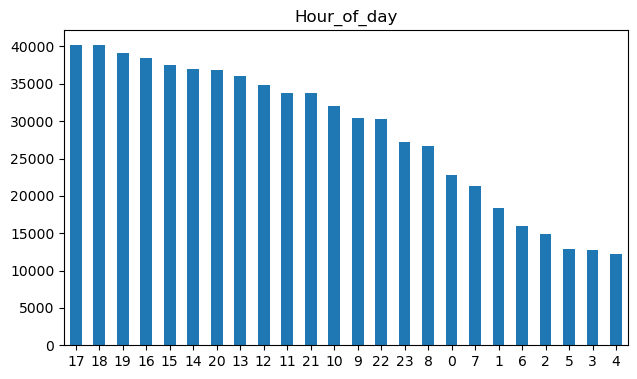

In [24]:
#Check Hour_of_day for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

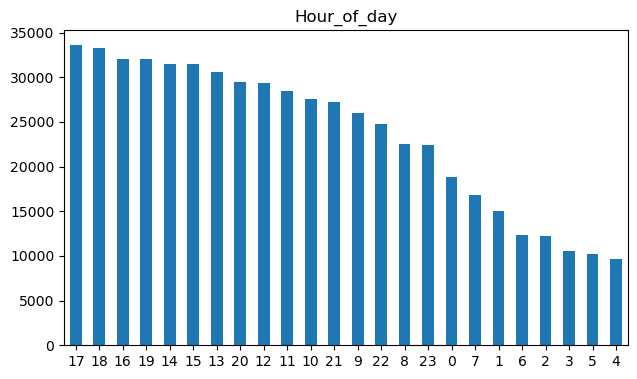

In [25]:
#Check Hour_of_day for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

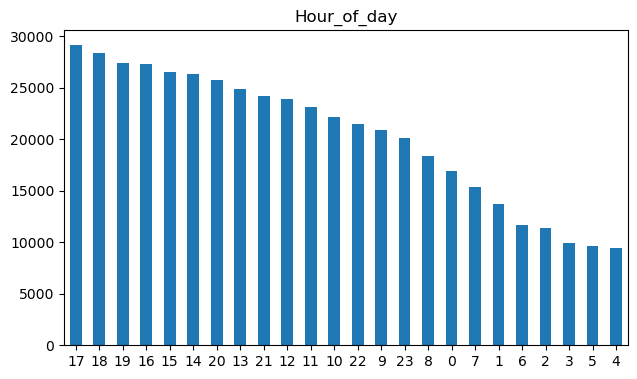

In [26]:
#Check Hour_of_day for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

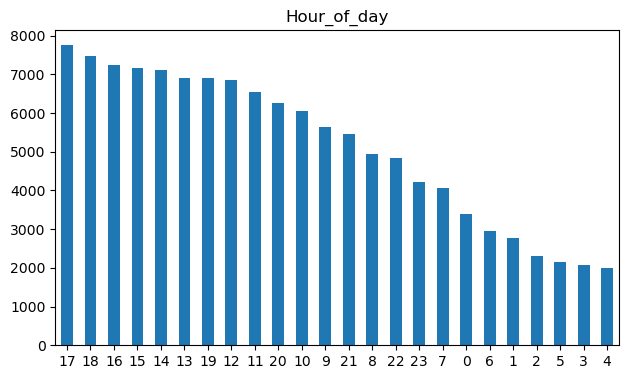

In [27]:
#Check Hour_of_day for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

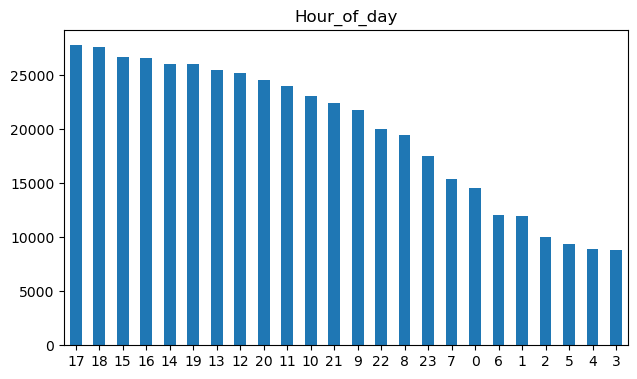

In [28]:
#Check Hour_of_day for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

## Look at Month data

In [29]:
df.MONTH.value_counts()

7     213437
8     210964
1     203893
10    201599
12    199571
9     198821
6     198015
11    191401
5     189184
3     182657
2     176211
4     174661
Name: MONTH, dtype: int64

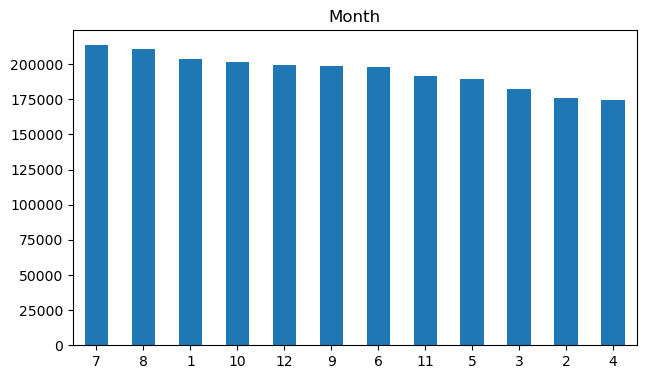

In [30]:
#The busiest two months are the dead of summer with July & August but Jan & Oct are right behind them.
#There is not a large difference between the months
plt.subplot(221)
df['MONTH'].value_counts().plot(kind='bar', title='Month', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

<AxesSubplot: title={'center': 'MONTH'}, xlabel='BOROUGH_DESC'>

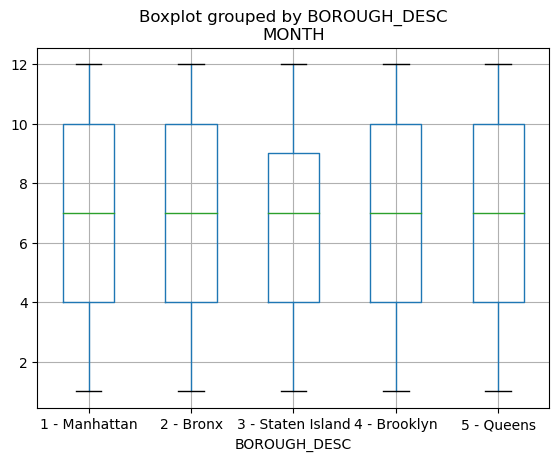

In [31]:
df.boxplot(column=['MONTH'], by='BOROUGH_DESC')

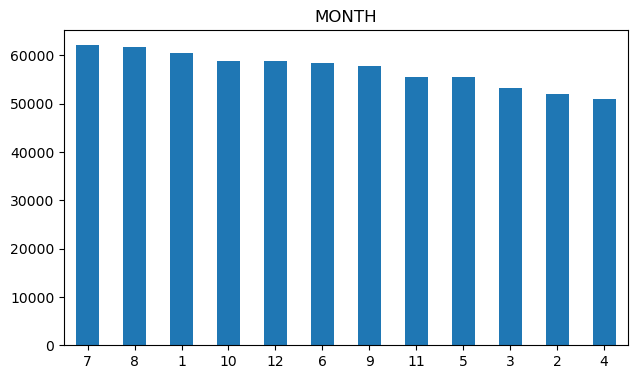

In [32]:
#Check MONTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['MONTH'].value_counts().plot(kind='bar', title='MONTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

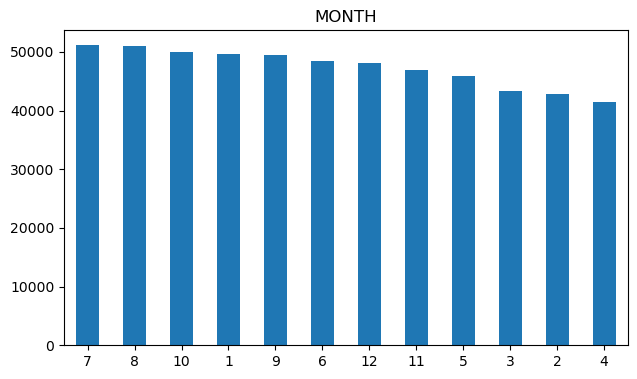

In [33]:
#Check MONTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['MONTH'].value_counts().plot(kind='bar', title='MONTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

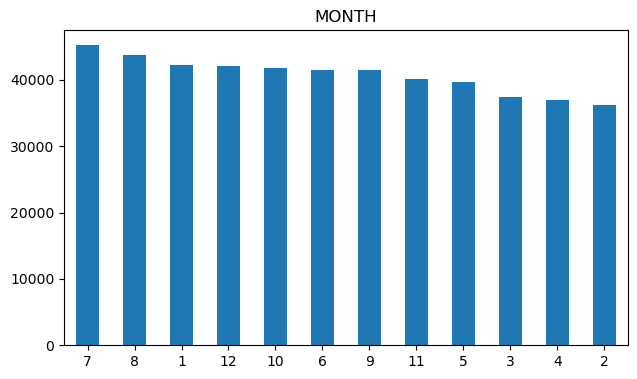

In [34]:
#Check MONTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['MONTH'].value_counts().plot(kind='bar', title='MONTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

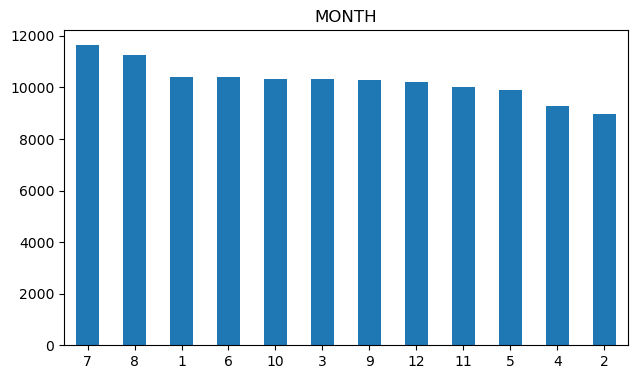

In [35]:
#Check MONTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['MONTH'].value_counts().plot(kind='bar', title='MONTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

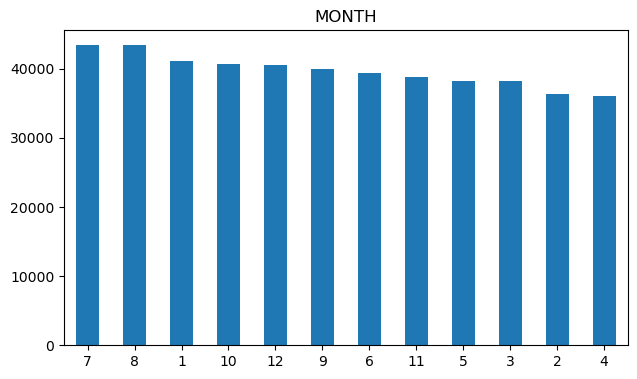

In [36]:
#Check MONTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['MONTH'].value_counts().plot(kind='bar', title='MONTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

## Units category data

In [37]:
df.UNITS_CATEGORY.value_counts()

1            1442297
2             380113
3             195020
6             103379
5             101955
4              98041
7 or more      19609
Name: UNITS_CATEGORY, dtype: int64

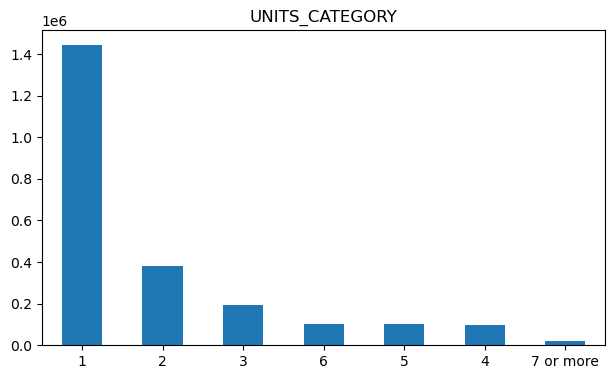

In [38]:
#Most of the time only one unit is needed 
plt.subplot(221)
df['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

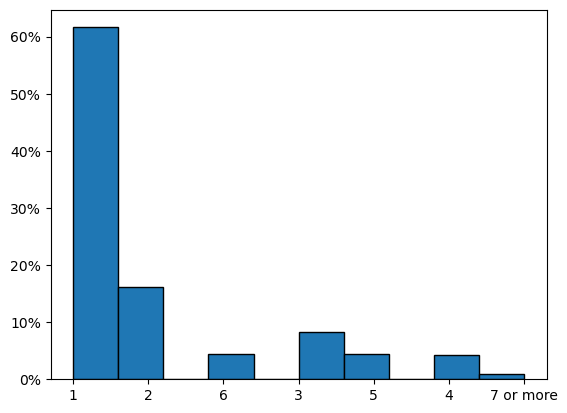

In [39]:
#Displays in relative frequency
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['UNITS_CATEGORY'], edgecolor='black',weights=np.ones_like(df['UNITS_CATEGORY'])*100/len(df['UNITS_CATEGORY']))
ax.yaxis.set_major_formatter(PercentFormatter())

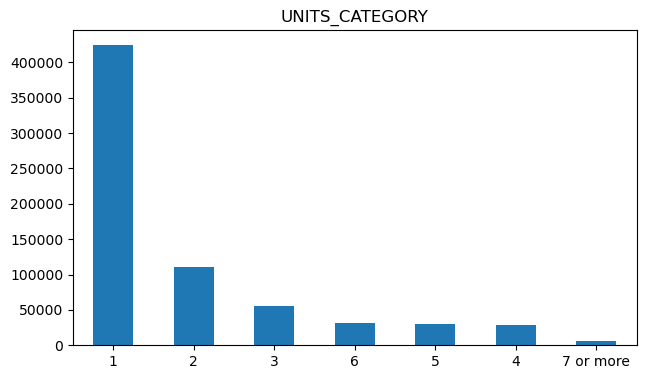

In [40]:
#Check UNITS_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

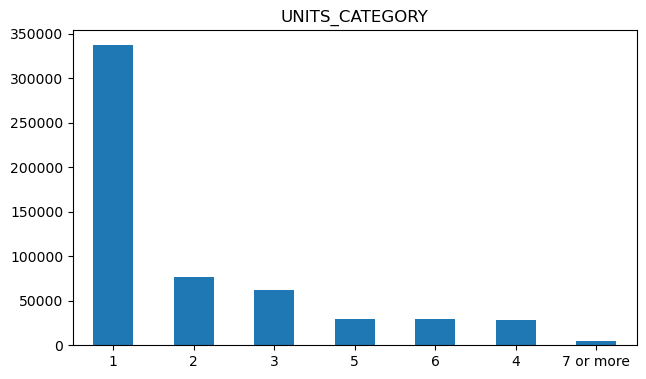

In [41]:
#Check UNITS_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

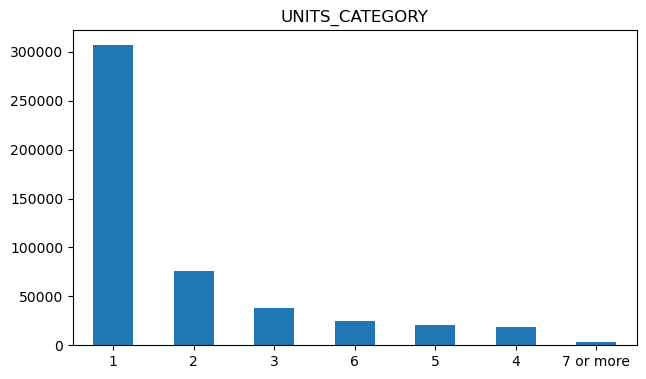

In [42]:
#Check UNITS_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

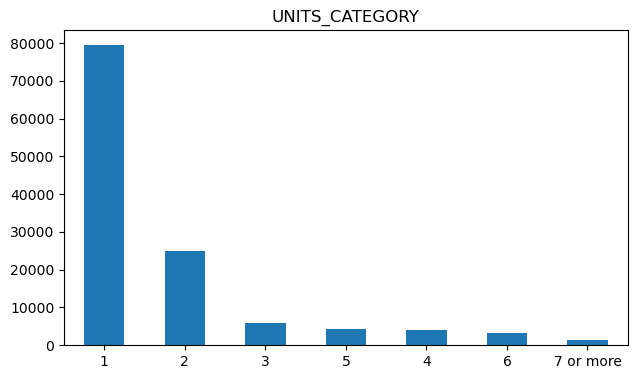

In [43]:
#Check UNITS_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

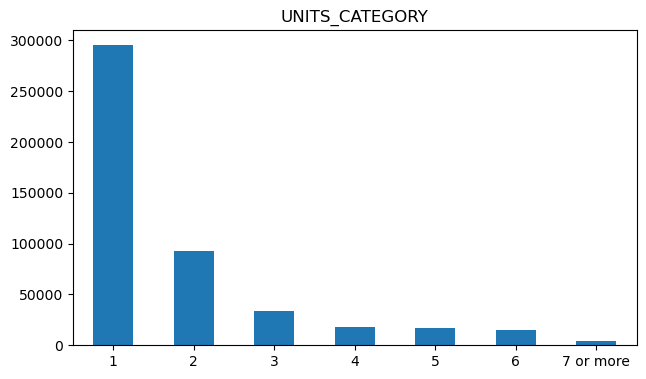

In [44]:
#Check UNITS_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

## Duration data

array([<AxesSubplot: title={'center': 'TOTAL_INCIDENT_DURATION'}, xlabel='BOROUGH_DESC'>,
       <AxesSubplot: title={'center': 'UNITS_ONSCENE'}, xlabel='BOROUGH_DESC'>],
      dtype=object)

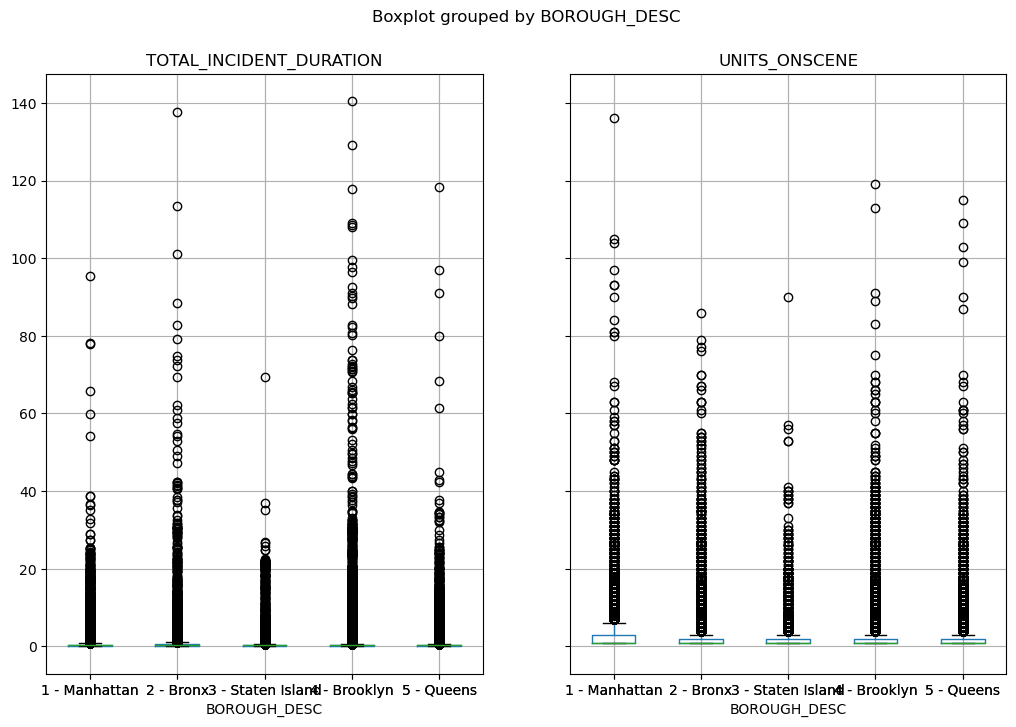

In [45]:
#Run a box plot for units on scence vs units(num) category(cat) and incident duration(num) vs incdient length(cat)
df.boxplot(column=['TOTAL_INCIDENT_DURATION','UNITS_ONSCENE'], by='BOROUGH_DESC', figsize=(12,8))

array([[<AxesSubplot: title={'center': 'TOTAL_INCIDENT_DURATION'}>]],
      dtype=object)

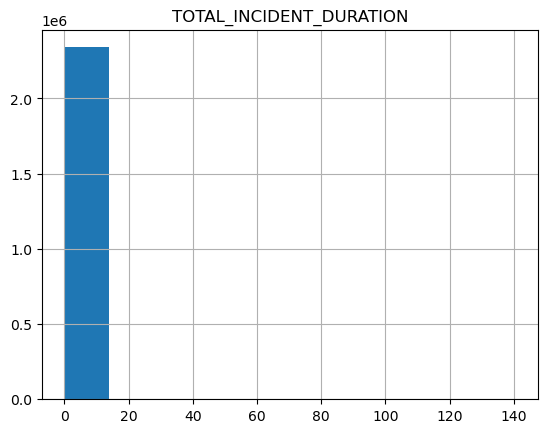

In [142]:
df.hist(column='TOTAL_INCIDENT_DURATION')

array([[<AxesSubplot: title={'center': 'UNITS_ONSCENE'}>]], dtype=object)

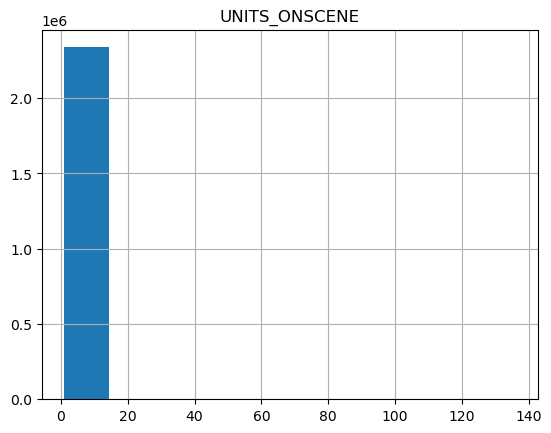

In [143]:
df.hist(column='UNITS_ONSCENE')

In [46]:
df.INCIDENT_LENGTH.value_counts()

15min-30min    962832
<=15min        914961
30min-45min    226714
45min-1hr      115634
1-2hr          105312
2-3hr            9278
3hr>             5683
Name: INCIDENT_LENGTH, dtype: int64

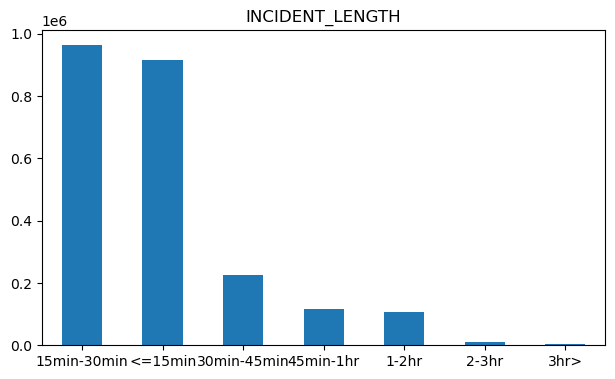

In [47]:
#Visual of above indicating incidents are resolved mostly in less than 15 minutes, followed by 15 -30 min range, then
#30-45 min range.
plt.subplot(221)
df['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

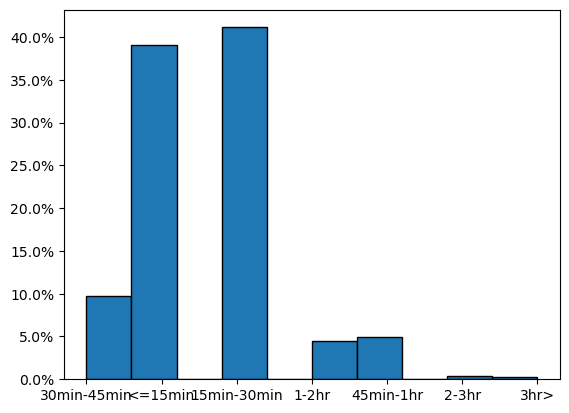

In [48]:
#Displays in relative frequency
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['INCIDENT_LENGTH'], edgecolor='black',weights=np.ones_like(df['INCIDENT_LENGTH'])*100/len(df['INCIDENT_LENGTH']))
ax.yaxis.set_major_formatter(PercentFormatter())

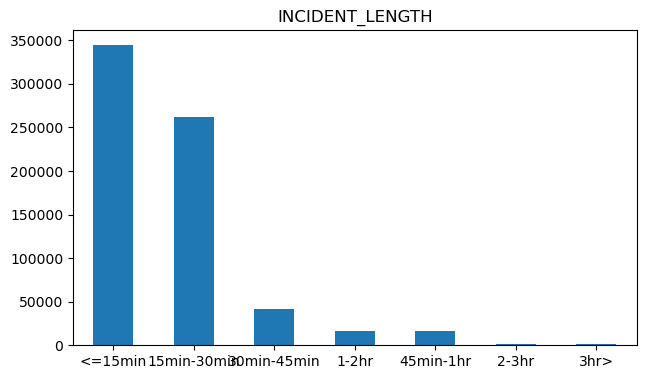

In [49]:
#Check INCIDENT_LENGTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

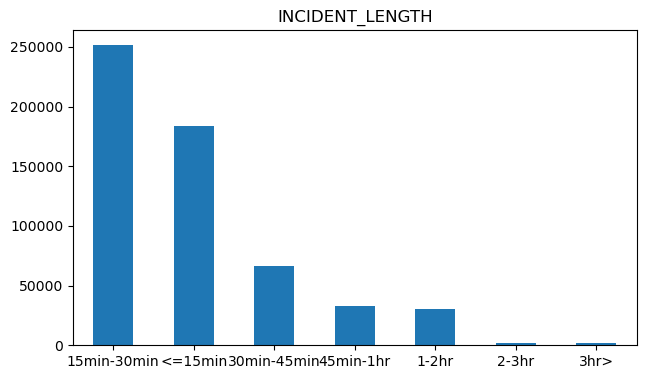

In [50]:
#Check INCIDENT_LENGTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

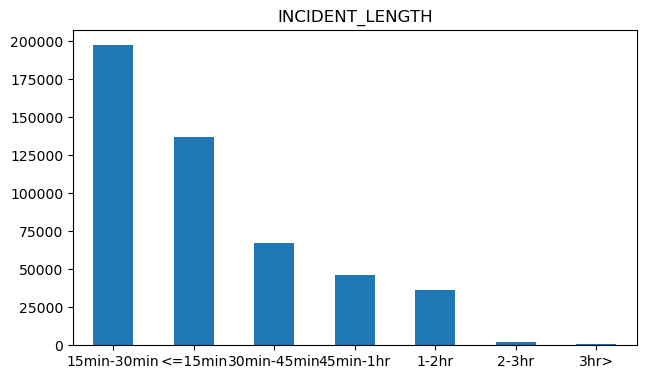

In [51]:
#Check INCIDENT_LENGTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

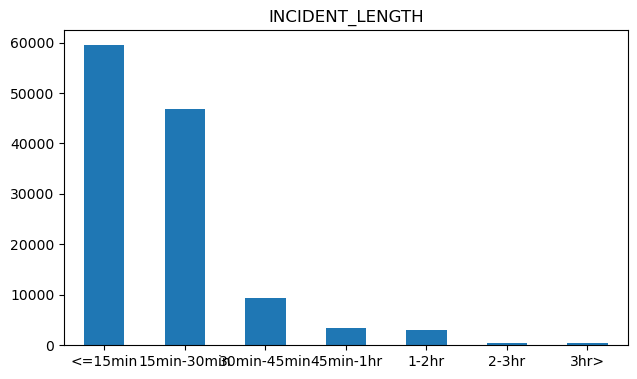

In [52]:
#Check INCIDENT_LENGTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

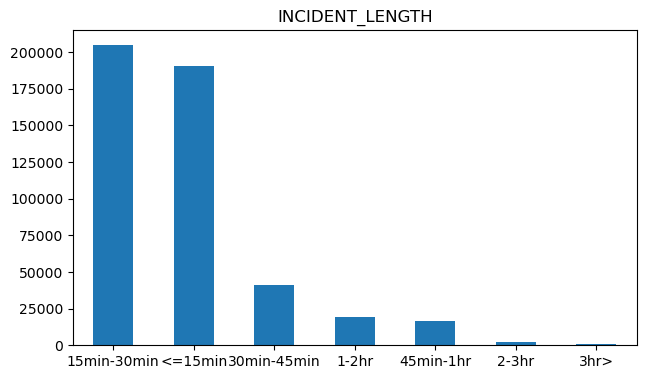

In [53]:
#Check INCIDENT_LENGTH for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

## Day of week data

In [54]:
df.Day_of_week.value_counts()

Friday       346758
Thursday     335433
Monday       335065
Saturday     335060
Tuesday      332973
Wednesday    331933
Sunday       323192
Name: Day_of_week, dtype: int64

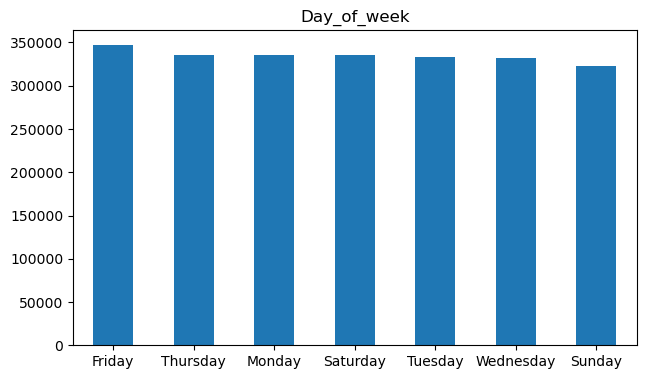

In [55]:
plt.subplot(221)
df['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

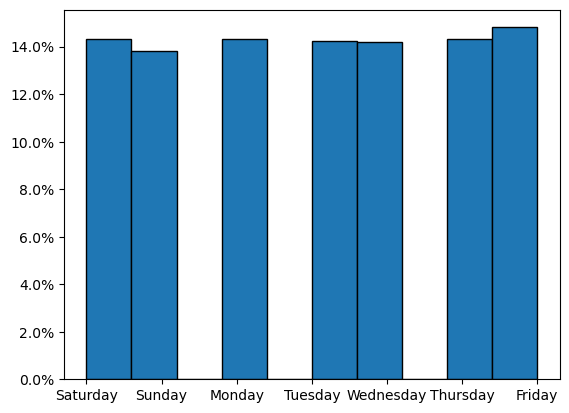

In [56]:
#Displays in relative frequency
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Day_of_week'], edgecolor='black',weights=np.ones_like(df['Day_of_week'])*100/len(df['Day_of_week']))
ax.yaxis.set_major_formatter(PercentFormatter())

<AxesSubplot: title={'center': 'DAY_NUM'}, xlabel='BOROUGH_DESC'>

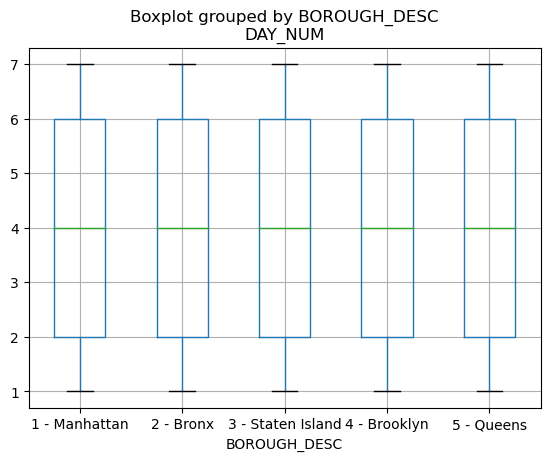

In [57]:
#Using DAY NUM(num) vs Day of week (cat)
df.boxplot(column=['DAY_NUM'], by='BOROUGH_DESC')

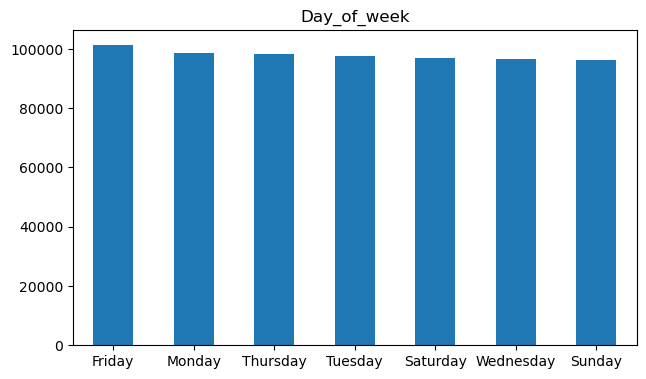

In [58]:
#Check DAY_OF_WEEK for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

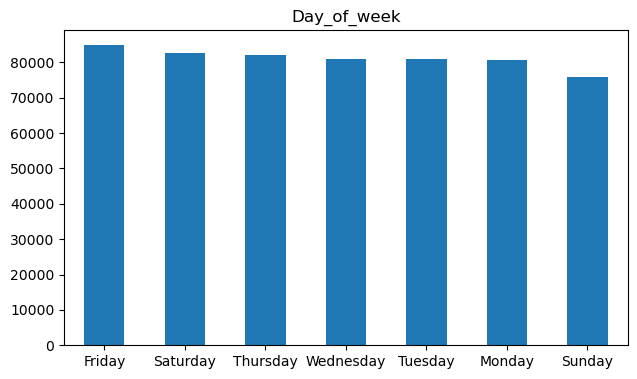

In [59]:
#Check DAY_OF_WEEK for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

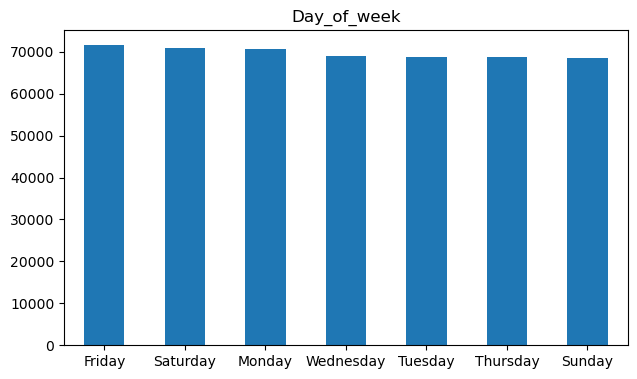

In [60]:
#Check DAY_OF_WEEK for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

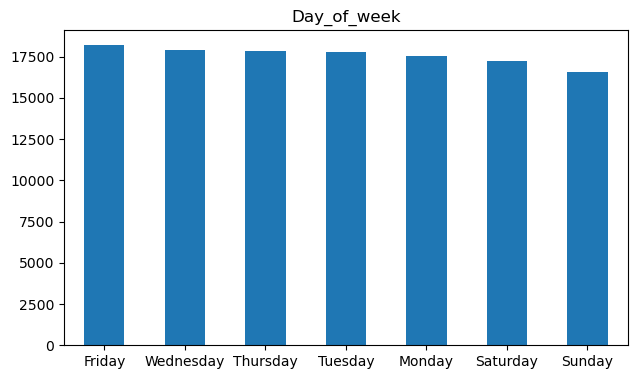

In [61]:
#Check DAY_OF_WEEK for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

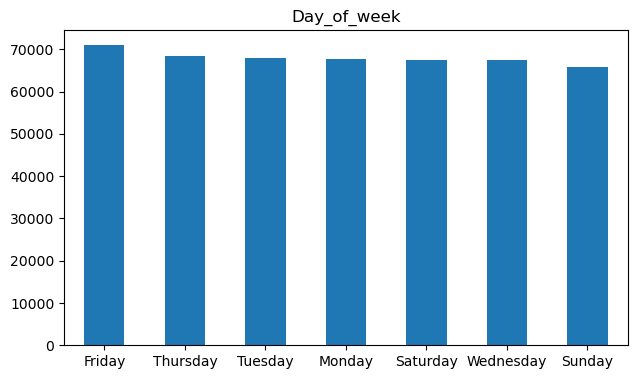

In [62]:
#Check DAY_OF_WEEK for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [63]:
df.INCIDENT_CATEGORY.value_counts()

RESCUE & EMS                                         1156625
FALSE ALARM FALSE CALL                                384618
SERVICE CALL                                          240022
HAZARDOUS CONDITION-NO FIRE                           191541
CANCELED, GOOD INTENT                                 185942
FIRE                                                  169626
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE      11690
SEVERE WEATHER & NATURAL DISASTER                        350
Name: INCIDENT_CATEGORY, dtype: int64

## Incident type data

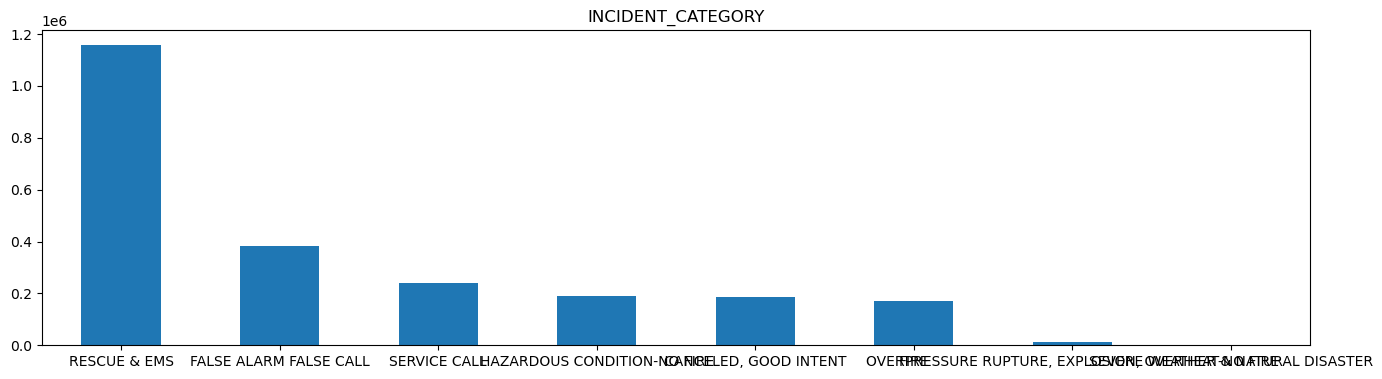

In [64]:
plt.subplot(221)
df['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

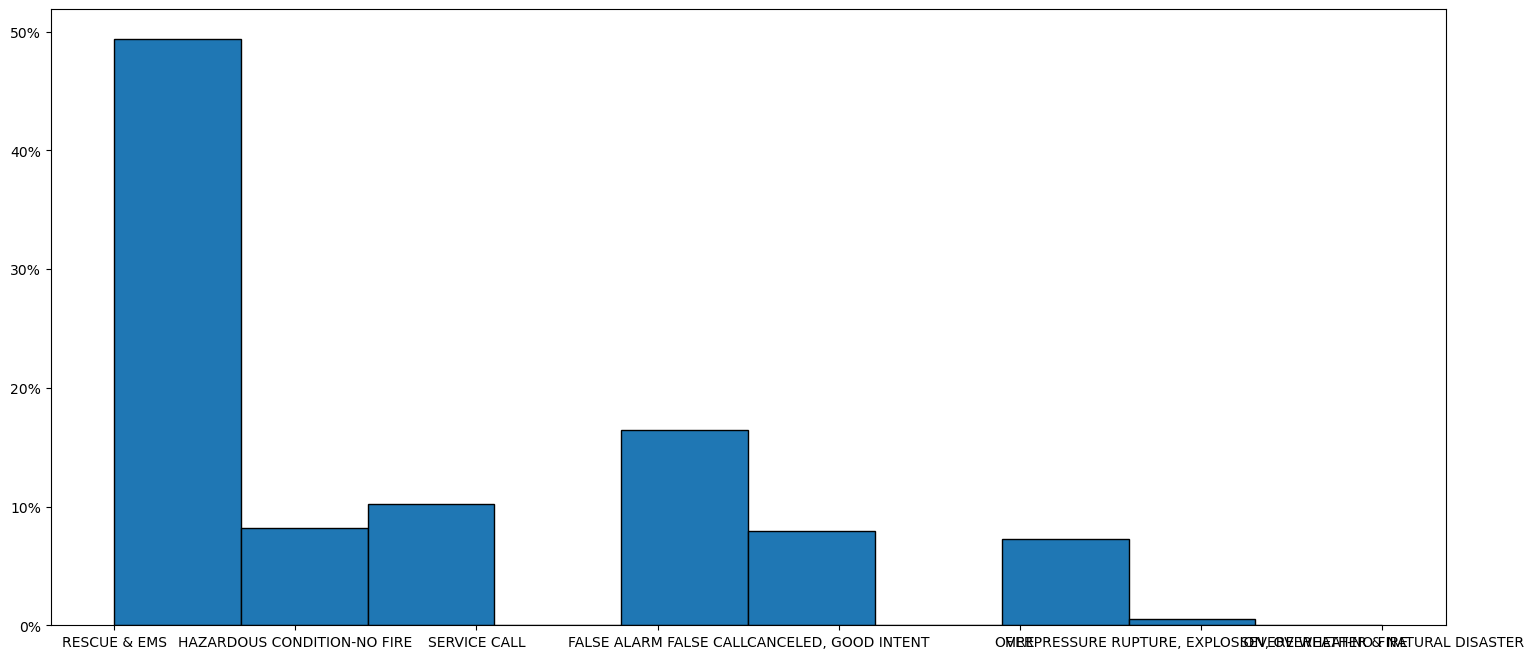

In [65]:
#Displays in relative frequency
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.hist(df['INCIDENT_CATEGORY'], edgecolor='black',weights=np.ones_like(df['INCIDENT_CATEGORY'])*100/len(df['INCIDENT_CATEGORY']))
ax.yaxis.set_major_formatter(PercentFormatter())

<AxesSubplot: title={'center': 'INCIDENT_CATNUM'}, xlabel='BOROUGH_DESC'>

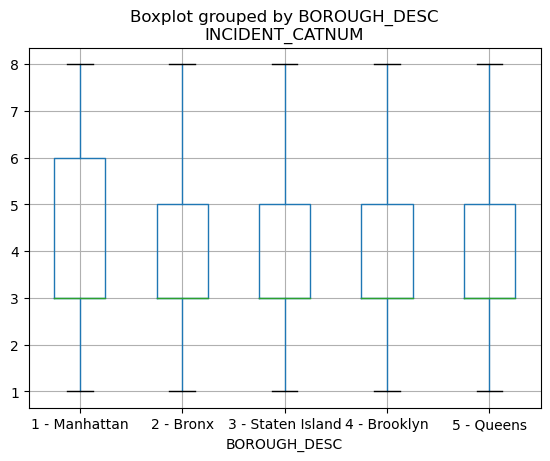

In [66]:
#Using incdent catnum(num) vs incident cat (cat)
df.boxplot(column=['INCIDENT_CATNUM'], by='BOROUGH_DESC')

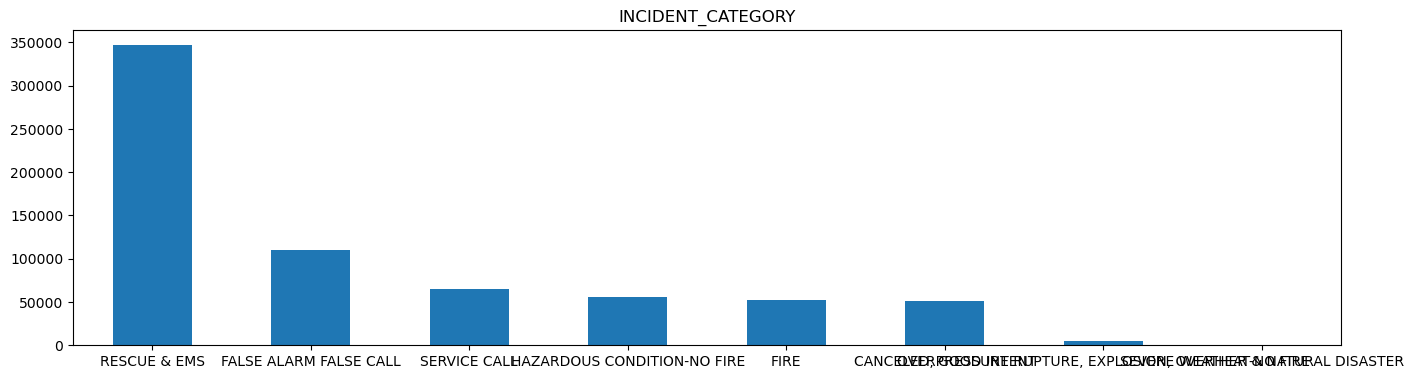

In [67]:
#Check INCIDENT_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['4 - Brooklyn'])]
plt.subplot(221)
df2['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

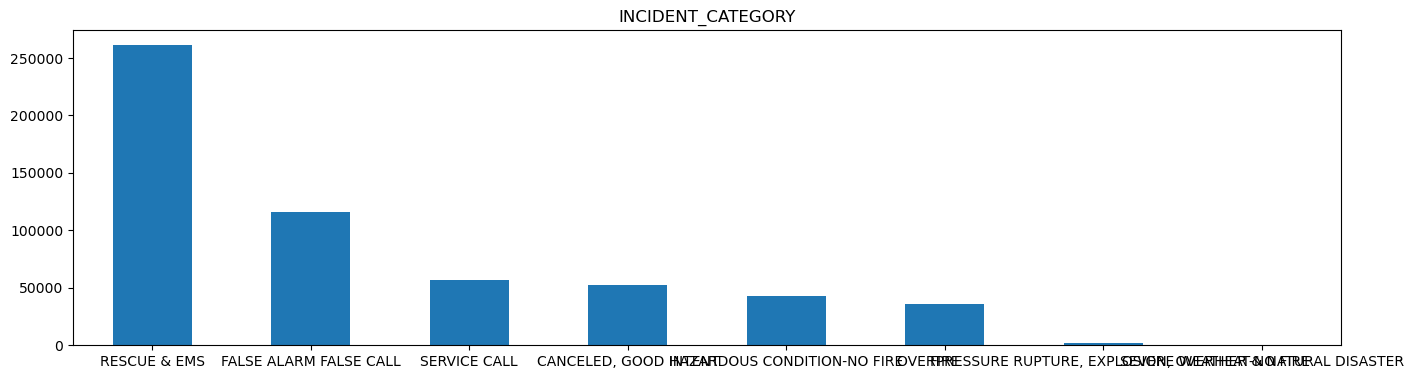

In [68]:
#Check INCIDENT_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['1 - Manhattan'])]
plt.subplot(221)
df2['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

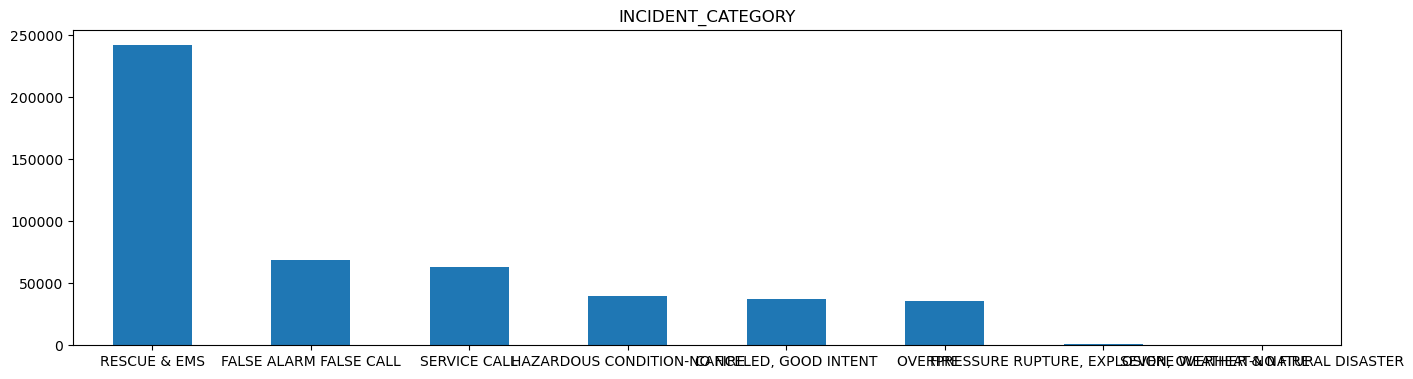

In [69]:
#Check INCIDENT_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['2 - Bronx'])]
plt.subplot(221)
df2['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

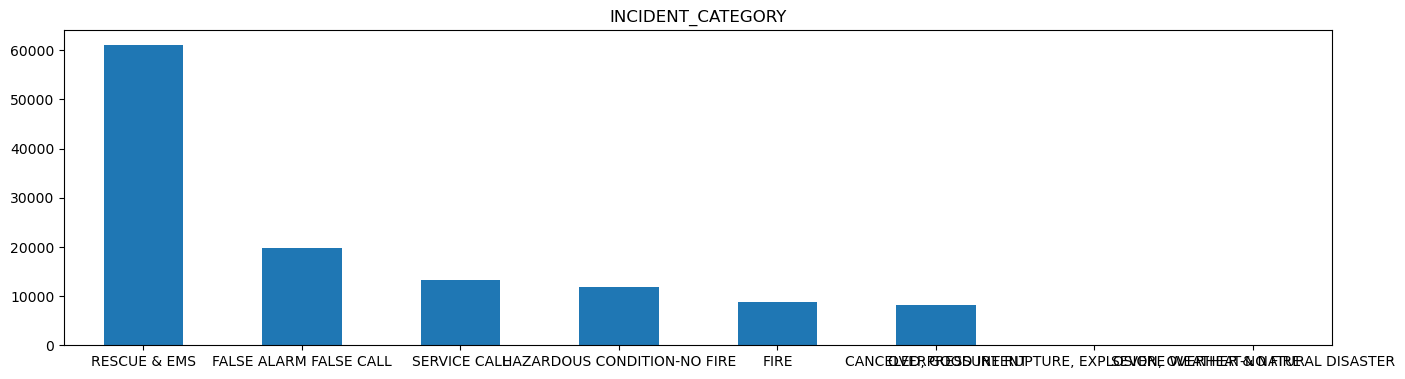

In [70]:
#Check INCIDENT_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['3 - Staten Island'])]
plt.subplot(221)
df2['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

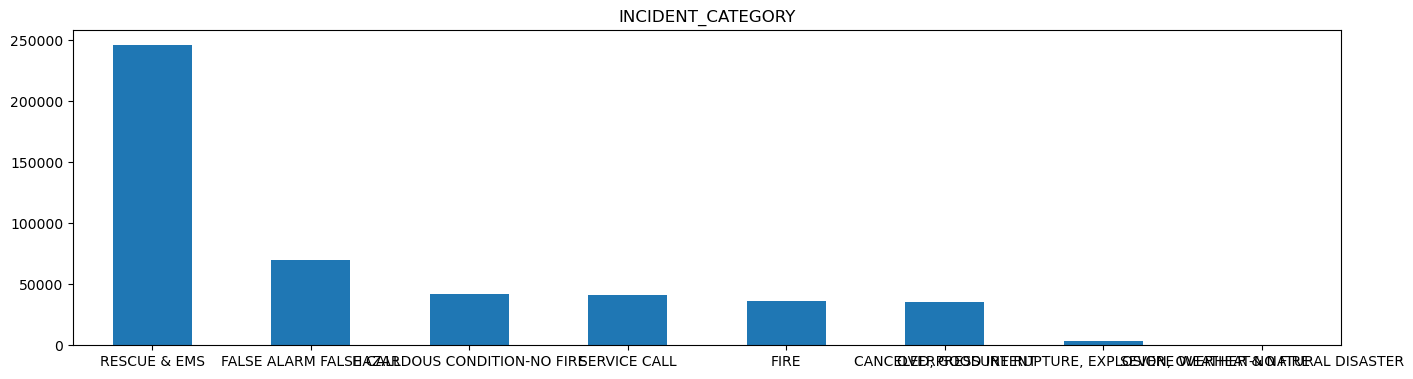

In [71]:
#Check INCIDENT_CATEGORY for each borough by filter
df2 = df[(df['BOROUGH_DESC']).isin(['5 - Queens'])]
plt.subplot(221)
df2['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(36,9))
plt.xticks(rotation=0)
plt.show()

In [72]:
df.ZIP_CODE.value_counts()

10029    61219
10456    51492
11206    44643
11212    36702
11207    35035
10002    32488
10451    31391
11201    28636
10467    28511
10457    28493
10027    28449
11208    28337
10453    28156
11101    27667
10458    27512
11226    26959
11211    26164
11221    26043
11233    25815
10314    24338
10460    23816
10035    23403
10454    22703
11236    22634
10025    22547
10452    22341
10009    22056
11203    21884
10455    21773
11234    21598
11213    19970
10021    19825
11224    19805
10003    19657
10472    19254
10468    19185
11691    19113
10469    18909
10473    18791
11385    18573
10032    18524
10016    17880
10001    17781
10463    17641
11216    17548
10466    17445
11229    17392
11235    17205
10459    17196
11373    17030
10019    16980
10031    16795
10026    16592
11230    16380
11368    16350
10462    15997
11432    15862
11434    15665
11210    15466
11220    15451
11217    15425
10011    15300
11214    15165
10036    15140
11237    15122
10304    15060
11205    1

## Check correlations

In [73]:
df.corr(method='pearson',numeric_only=True)

IM_INCIDENT_KEY  UNITS_ONSCENE  \
IM_INCIDENT_KEY                 1.000000      -0.040233   
UNITS_ONSCENE                  -0.040233       1.000000   
TOTAL_INCIDENT_DURATION         0.017105       0.184261   
ZIP_CODE                        0.008336      -0.031708   
INCIDENT_CATNUM                -0.017575       0.071559   
LEVEL_CATEGORY                 -0.010357       0.374696   
BOROUGH_NUM                     0.007931      -0.035557   
Hour_of_day                    -0.006727       0.003546   
MONTH                           0.213033      -0.015533   
DAY_NUM                         0.002033       0.004047   

                         TOTAL_INCIDENT_DURATION  ZIP_CODE  INCIDENT_CATNUM  \
IM_INCIDENT_KEY                         0.017105  0.008336        -0.017575   
UNITS_ONSCENE                           0.184261 -0.031708         0.071559   
TOTAL_INCIDENT_DURATION                 1.000000 -0.048564        -0.102728   
ZIP_CODE                               -0.048564  1.000000        -0.058965   
INCIDENT_CATNUM                        -0.102728 -0.058965         1.000000   
LEVEL_CATEGORY                          0.166480  0.013437        -0.101327   
BOROUGH_NUM                            -0.049762  0.965793        -0.057906   
Hour_of_day                            -0.013309 -0.001846        -0.039491   
MONTH                                  -0.000028 -0.003663         0.004528   
DAY_NUM                                -0.005594  0.001425        -0.016918   

                         LEVEL_CATEGORY  BOROUGH_NUM  Hour_of_day     MONTH  \
IM_INCIDENT_KEY               -0.010357     0.007931    -0.006727  0.213033   
UNITS_ONSCENE                  0.374696    -0.035557     0.003546 -0.015533   
TOTAL_INCIDENT_DURATION        0.166480    -0.049762    -0.013309 -0.000028   
ZIP_CODE                       0.013437     0.965793    -0.001846 -0.003663   
INCIDENT_CATNUM               -0.101327    -0.057906    -0.039491  0.004528   
LEVEL_CATEGORY                 1.000000     0.014452    -0.005480 -0.009963   
BOROUGH_NUM                    0.014452     1.000000    -0.002105 -0.004142   
Hour_of_day                   -0.005480    -0.002105     1.000000 -0.002603   
MONTH                         -0.009963    -0.004142    -0.002603  1.000000   
DAY_NUM                        0.001813     0.000721    -0.015477  0.008207   

                          DAY_NUM  
IM_INCIDENT_KEY          0.002033  
UNITS_ONSCENE            0.004047  
TOTAL_INCIDENT_DURATION -0.005594  
ZIP_CODE                 0.001425  
INCIDENT_CATNUM         -0.016918  
LEVEL_CATEGORY           0.001813  
BOROUGH_NUM              0.000721  
Hour_of_day             -0.015477  
MONTH                    0.008207  
DAY_NUM                  1.000000

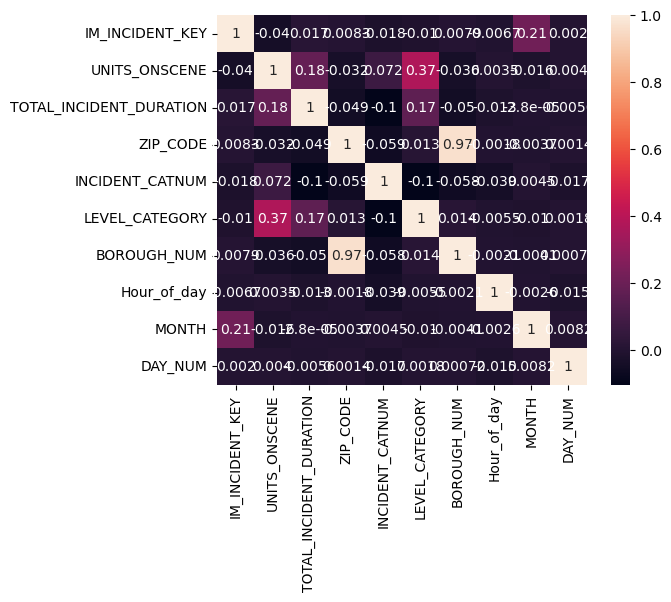

In [74]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, square = True)
plt.yticks(rotation=0)
plt.show()

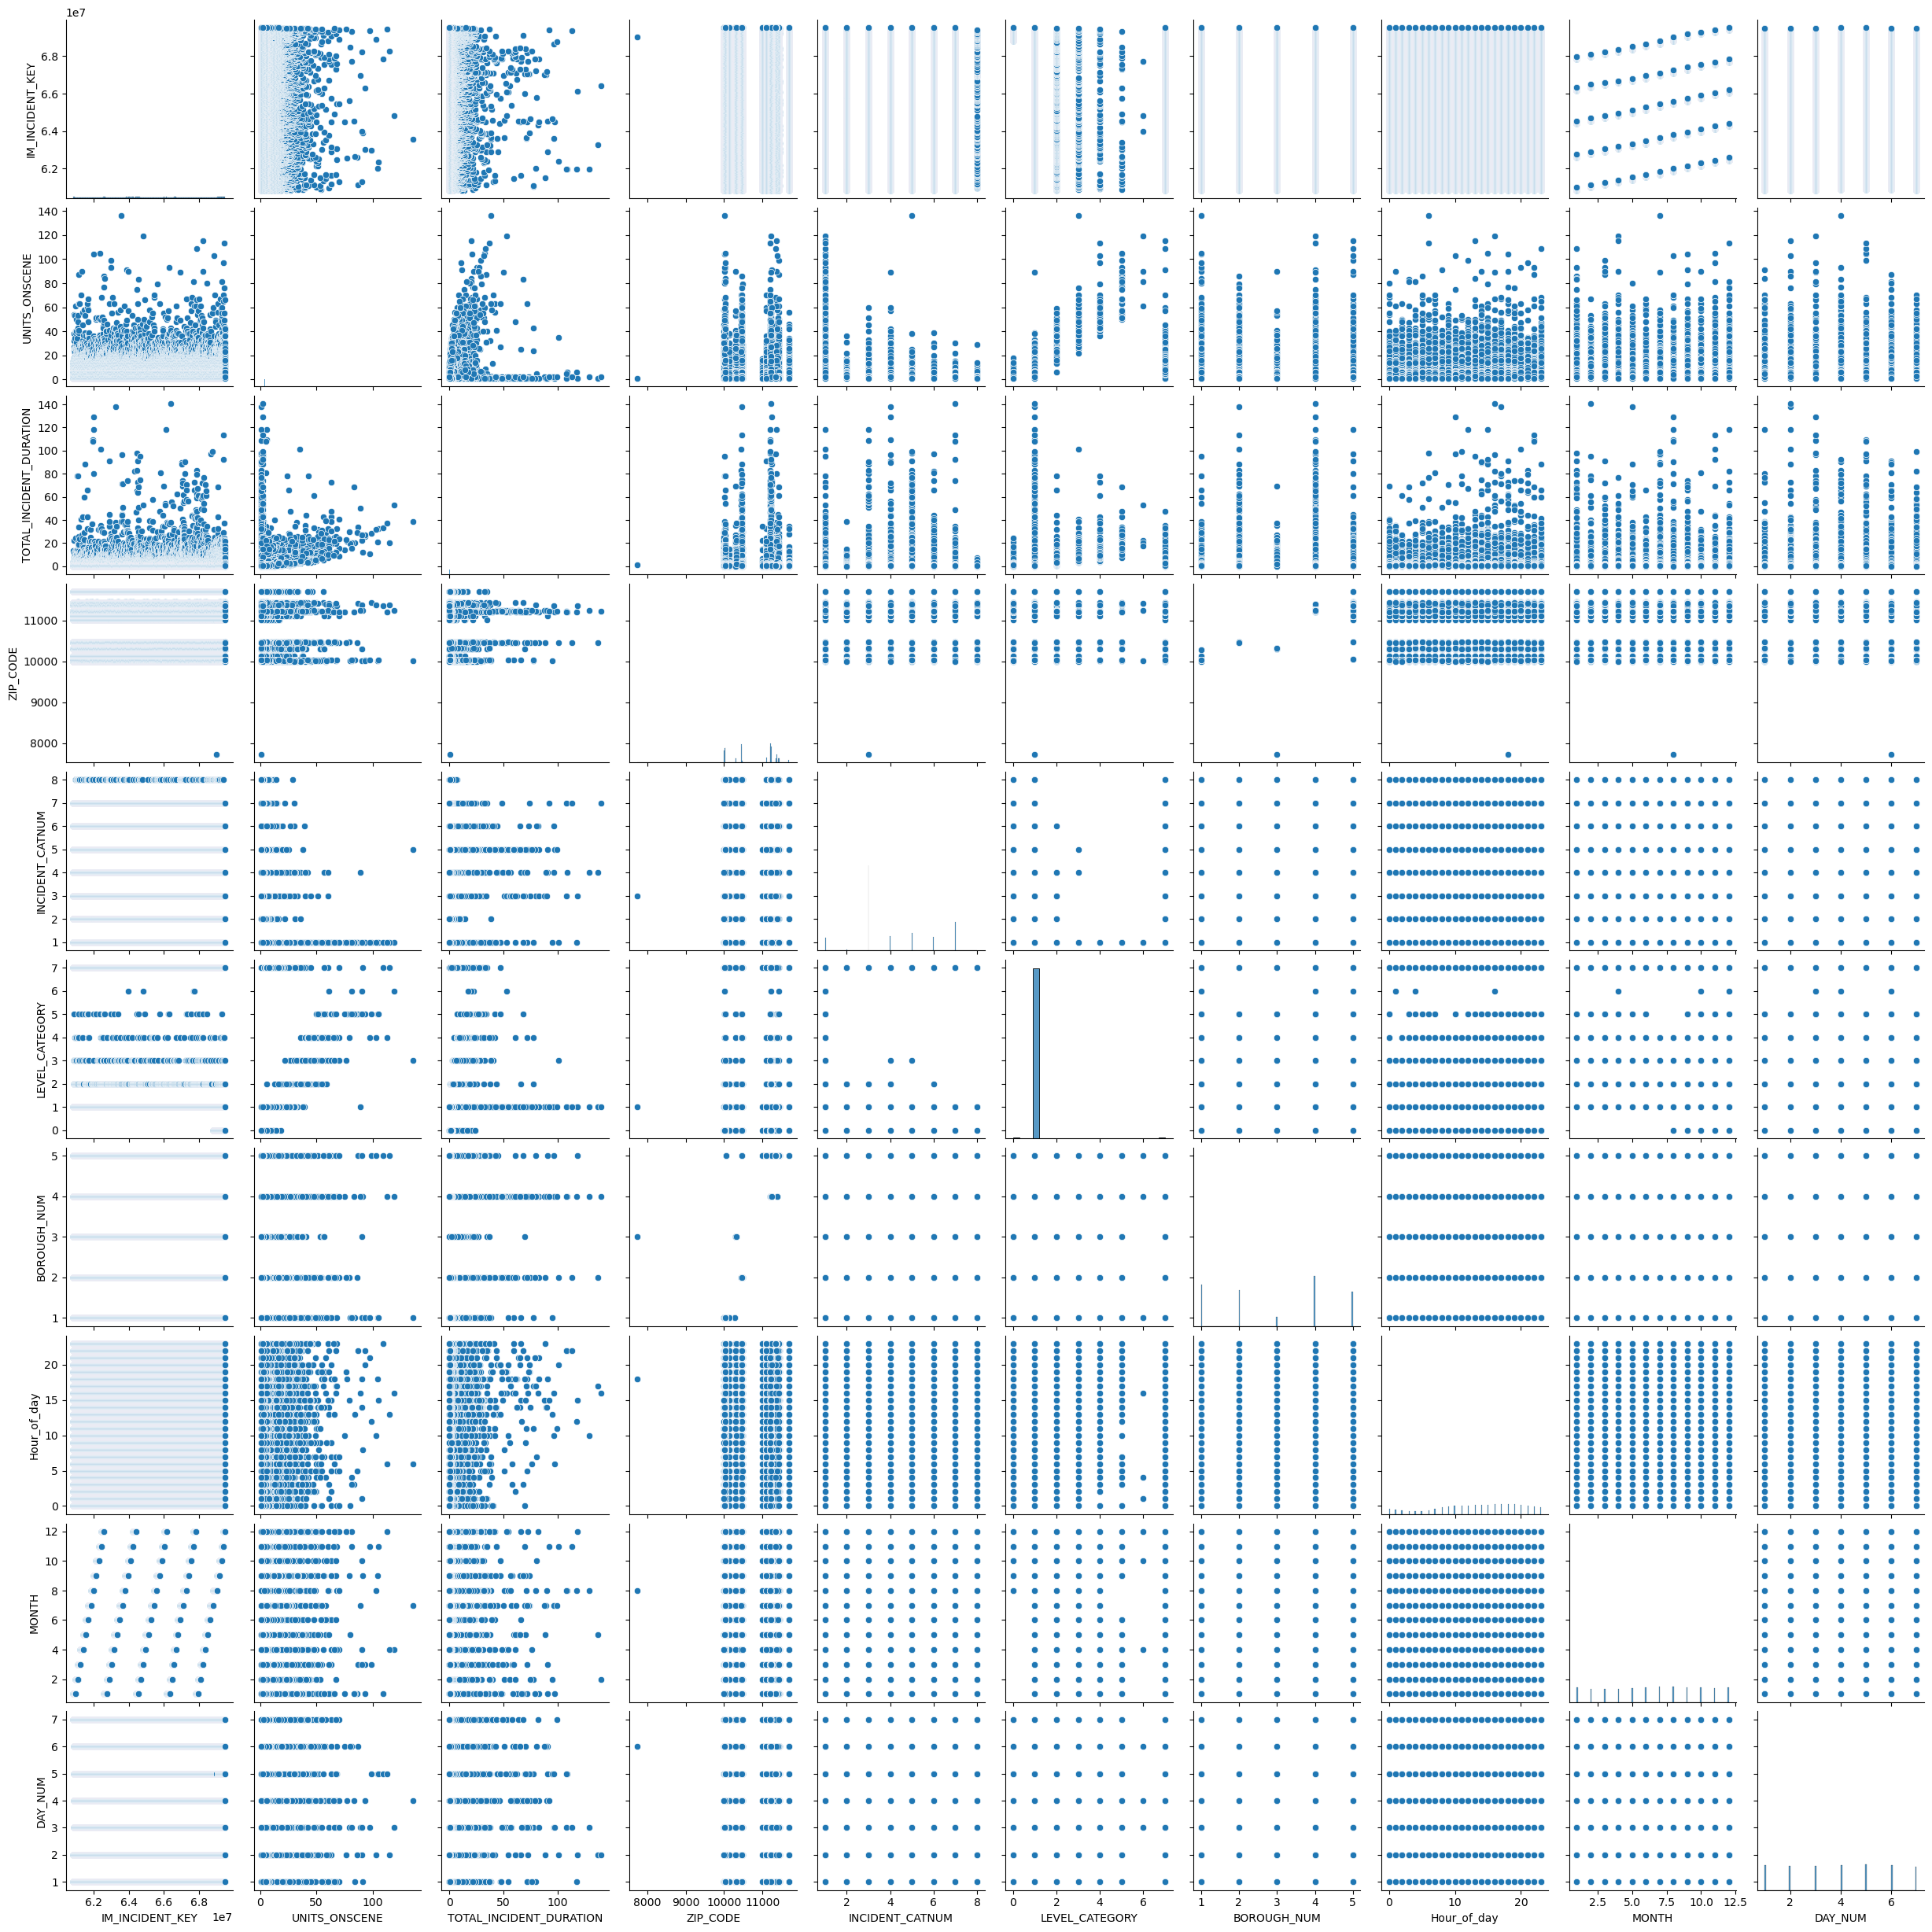

In [75]:
sns.pairplot(df)

array([[<AxesSubplot: xlabel='IM_INCIDENT_KEY', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='UNITS_ONSCENE', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='TOTAL_INCIDENT_DURATION', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='ZIP_CODE', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='INCIDENT_CATNUM', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='LEVEL_CATEGORY', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='BOROUGH_NUM', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='Hour_of_day', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='MONTH', ylabel='IM_INCIDENT_KEY'>,
        <AxesSubplot: xlabel='DAY_NUM', ylabel='IM_INCIDENT_KEY'>],
       [<AxesSubplot: xlabel='IM_INCIDENT_KEY', ylabel='UNITS_ONSCENE'>,
        <AxesSubplot: xlabel='UNITS_ONSCENE', ylabel='UNITS_ONSCENE'>,
        <AxesSubplot: xlabel='TOTAL_INCIDENT_DURATION', ylabel='UNITS_ONSCENE'>,
        <AxesSubplot: xlabel='ZIP_CODE', ylabel='UNI

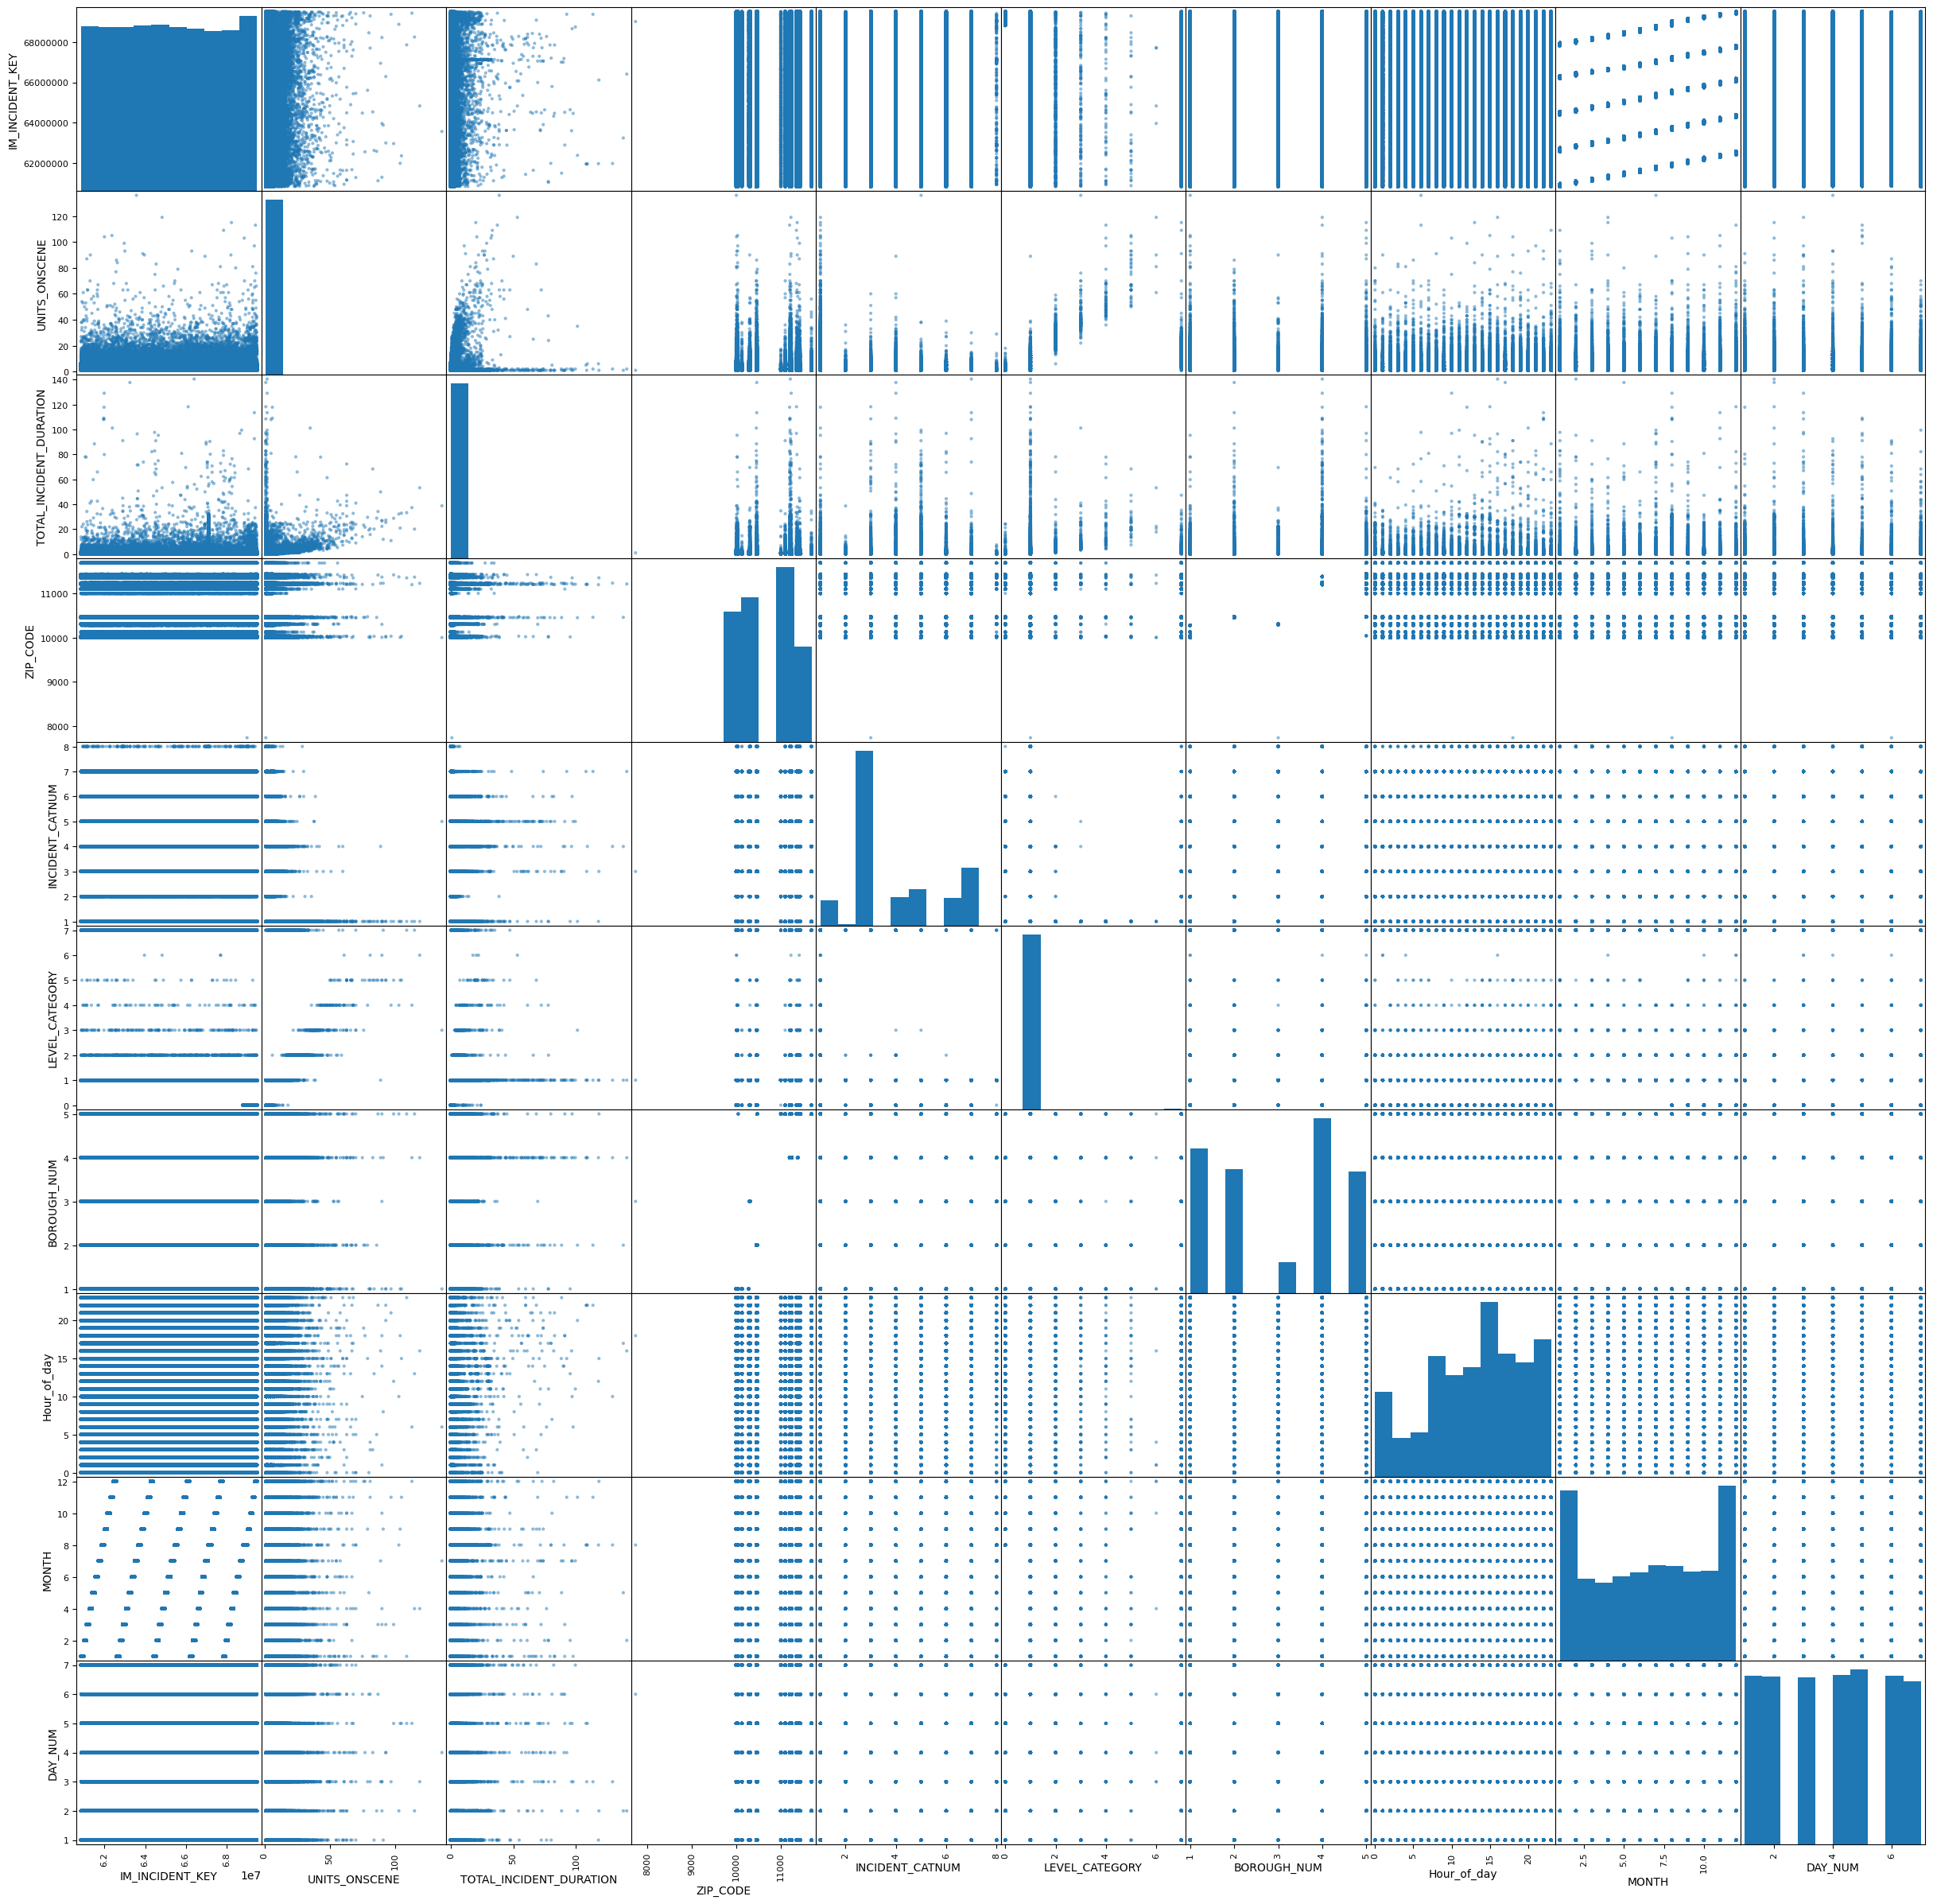

In [76]:
pd.plotting.scatter_matrix(df, figsize=(30,30))

In [144]:
#Creating a DataFrame with all categorical variables
df_cat = pd.DataFrame(data = df.dtypes, columns = ['a']).reset_index()
catvar = list(df_cat['index'].loc[df_cat['a'] == 'object'])
catvar
df_cat = df[catvar]
df_cat.head()

BOROUGH_DESC            INCIDENT_CATEGORY Day_of_week INCIDENT_LENGTH  \
0     2 - Bronx                 RESCUE & EMS    Saturday     30min-45min   
1  4 - Brooklyn                 RESCUE & EMS    Saturday         <=15min   
2  4 - Brooklyn  HAZARDOUS CONDITION-NO FIRE    Saturday         <=15min   
3  4 - Brooklyn                 SERVICE CALL    Saturday     15min-30min   
4  4 - Brooklyn                 RESCUE & EMS    Saturday     15min-30min   

  UNITS_CATEGORY  
0              1  
1              1  
2              2  
3              1  
4              1

In [145]:
#Split this list into two parts
catvar1 = ('BOROUGH_DESC', 'INCIDENT_CATEGORY', 'Day_of_week', 'INCIDENT_LENGTH', 'UNITS_CATEGORY')
catvar2 = ('BOROUGH_DESC', 'INCIDENT_CATEGORY', 'Day_of_week', 'INCIDENT_LENGTH', 'UNITS_CATEGORY')

In [146]:
#Create all possible combinations between the variables
catvar_prod = list(product(catvar1,catvar2, repeat = 1))
catvar_prod

[('BOROUGH_DESC', 'BOROUGH_DESC'),
 ('BOROUGH_DESC', 'INCIDENT_CATEGORY'),
 ('BOROUGH_DESC', 'Day_of_week'),
 ('BOROUGH_DESC', 'INCIDENT_LENGTH'),
 ('BOROUGH_DESC', 'UNITS_CATEGORY'),
 ('INCIDENT_CATEGORY', 'BOROUGH_DESC'),
 ('INCIDENT_CATEGORY', 'INCIDENT_CATEGORY'),
 ('INCIDENT_CATEGORY', 'Day_of_week'),
 ('INCIDENT_CATEGORY', 'INCIDENT_LENGTH'),
 ('INCIDENT_CATEGORY', 'UNITS_CATEGORY'),
 ('Day_of_week', 'BOROUGH_DESC'),
 ('Day_of_week', 'INCIDENT_CATEGORY'),
 ('Day_of_week', 'Day_of_week'),
 ('Day_of_week', 'INCIDENT_LENGTH'),
 ('Day_of_week', 'UNITS_CATEGORY'),
 ('INCIDENT_LENGTH', 'BOROUGH_DESC'),
 ('INCIDENT_LENGTH', 'INCIDENT_CATEGORY'),
 ('INCIDENT_LENGTH', 'Day_of_week'),
 ('INCIDENT_LENGTH', 'INCIDENT_LENGTH'),
 ('INCIDENT_LENGTH', 'UNITS_CATEGORY'),
 ('UNITS_CATEGORY', 'BOROUGH_DESC'),
 ('UNITS_CATEGORY', 'INCIDENT_CATEGORY'),
 ('UNITS_CATEGORY', 'Day_of_week'),
 ('UNITS_CATEGORY', 'INCIDENT_LENGTH'),
 ('UNITS_CATEGORY', 'UNITS_CATEGORY')]

In [155]:
df_catv1 = df_cat
df_catv1.shape

(2340414, 5)

In [156]:
#Create an empty variable and pick only the p value from the output of Chi-Square test
result = []
for i in catvar_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_catv1[i[0]], df_catv1[i[1]])))[1]))
result

[('BOROUGH_DESC', 'INCIDENT_CATEGORY', 0.0),
 ('BOROUGH_DESC', 'Day_of_week', 1.9310523659755727e-50),
 ('BOROUGH_DESC', 'INCIDENT_LENGTH', 0.0),
 ('BOROUGH_DESC', 'UNITS_CATEGORY', 0.0),
 ('INCIDENT_CATEGORY', 'BOROUGH_DESC', 0.0),
 ('INCIDENT_CATEGORY', 'Day_of_week', 0.0),
 ('INCIDENT_CATEGORY', 'INCIDENT_LENGTH', 0.0),
 ('INCIDENT_CATEGORY', 'UNITS_CATEGORY', 0.0),
 ('Day_of_week', 'BOROUGH_DESC', 1.931052365975517e-50),
 ('Day_of_week', 'INCIDENT_CATEGORY', 0.0),
 ('Day_of_week', 'INCIDENT_LENGTH', 2.4960041249180874e-120),
 ('Day_of_week', 'UNITS_CATEGORY', 0.0),
 ('INCIDENT_LENGTH', 'BOROUGH_DESC', 0.0),
 ('INCIDENT_LENGTH', 'INCIDENT_CATEGORY', 0.0),
 ('INCIDENT_LENGTH', 'Day_of_week', 2.4960041249178022e-120),
 ('INCIDENT_LENGTH', 'UNITS_CATEGORY', 0.0),
 ('UNITS_CATEGORY', 'BOROUGH_DESC', 0.0),
 ('UNITS_CATEGORY', 'INCIDENT_CATEGORY', 0.0),
 ('UNITS_CATEGORY', 'Day_of_week', 0.0),
 ('UNITS_CATEGORY', 'INCIDENT_LENGTH', 0.0)]

In [157]:
#Create crosstab
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2               BOROUGH_DESC    Day_of_week  INCIDENT_CATEGORY  \
var1                                                                
BOROUGH_DESC                NaN   1.931052e-50                0.0   
Day_of_week        1.931052e-50            NaN                0.0   
INCIDENT_CATEGORY  0.000000e+00   0.000000e+00                NaN   
INCIDENT_LENGTH    0.000000e+00  2.496004e-120                0.0   
UNITS_CATEGORY     0.000000e+00   0.000000e+00                0.0   

var2               INCIDENT_LENGTH  UNITS_CATEGORY  
var1                                                
BOROUGH_DESC          0.000000e+00             0.0  
Day_of_week          2.496004e-120             0.0  
INCIDENT_CATEGORY     0.000000e+00             0.0  
INCIDENT_LENGTH                NaN             0.0  
UNITS_CATEGORY        0.000000e+00             NaN

The table shows that all p values are less than .05 meaning they are all significant and dependent but I do not believe that is correct
I think there is a coding error above or we have a Type I error (false positive). We'll dig further.

Part of the reason I believe this is not correct is I have converted categorical to numerical and vice versa and the Pearson correlation doesn't indicate much significance.

## Crosstabs and line graphs

<AxesSubplot: xlabel='MONTH', ylabel='counts'>

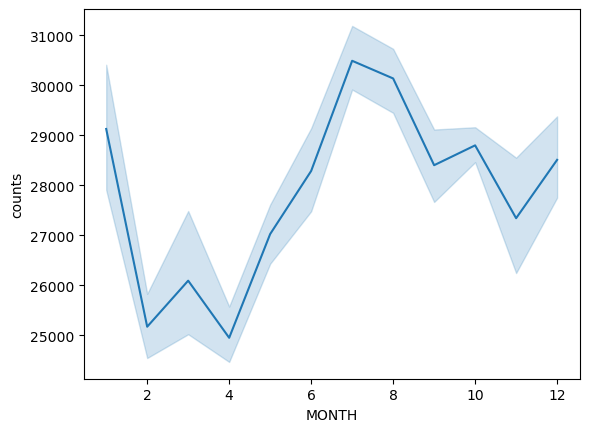

In [183]:
#plot count of incidents by month with day of week
df2 = df.groupby(['MONTH', 'DAY_NUM']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='MONTH', y='counts')

In [184]:
pd.crosstab(df.MONTH,df.Day_of_week, normalize='columns')
#No anomolies when viewing month & day of the week. Seems consistent

Day_of_week    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
MONTH                                                                     
1            0.084024  0.089036  0.079839  0.083384  0.086619  0.095990   
2            0.075491  0.076454  0.079096  0.074689  0.073335  0.073958   
3            0.085452  0.076203  0.076407  0.074491  0.080621  0.074496   
4            0.071563  0.079167  0.074458  0.076589  0.075386  0.072853   
5            0.082005  0.077349  0.080039  0.080689  0.080743  0.081607   
6            0.084843  0.084706  0.089530  0.085256  0.081268  0.086037   
7            0.089593  0.096396  0.090557  0.093743  0.088140  0.089100   
8            0.088041  0.086097  0.089608  0.089900  0.092469  0.094386   
9            0.080834  0.079925  0.086952  0.088403  0.085370  0.082697   
10           0.084653  0.085106  0.086972  0.086989  0.084834  0.088322   
11           0.084837  0.083730  0.079654  0.078405  0.087356  0.078700   
12           0.088664  0.085831  0.086886  0.087462  0.083859  0.081853   

Day_of_week  Wednesday  
MONTH                   
1             0.091003  
2             0.073964  
3             0.078236  
4             0.072527  
5             0.083384  
6             0.080598  
7             0.090979  
8             0.090569  
9             0.090783  
10            0.086189  
11            0.079510  
12            0.082258

<AxesSubplot: xlabel='Day_of_week', ylabel='counts'>

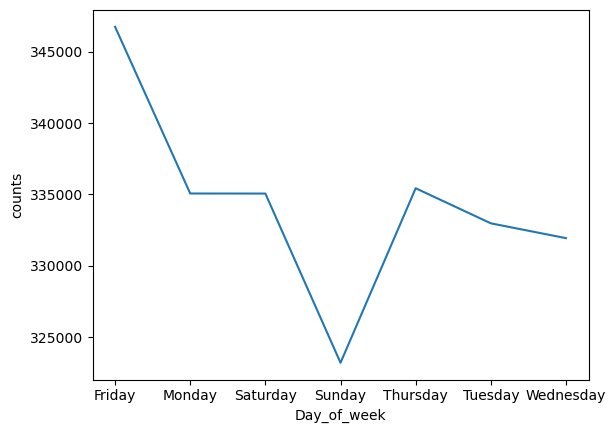

In [185]:
#plot count of incidents by day of week
df2 = df.groupby(['Day_of_week']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='Day_of_week', y='counts')

In [186]:
pd.crosstab(df.Hour_of_day,df.MONTH, normalize='columns')
#Calls per hour of the day are consistent each month

MONTH              1         2         3         4         5         6   \
Hour_of_day                                                               
0            0.031654  0.030855  0.030839  0.031656  0.032466  0.034093   
1            0.025558  0.024817  0.024138  0.025902  0.025927  0.027564   
2            0.021467  0.019976  0.018844  0.020898  0.021212  0.022503   
3            0.018490  0.017927  0.017601  0.017949  0.018109  0.019201   
4            0.018171  0.017286  0.017525  0.017703  0.017258  0.017216   
5            0.020123  0.019011  0.018860  0.018550  0.017232  0.017807   
6            0.024199  0.023846  0.023919  0.022718  0.022158  0.022513   
7            0.033218  0.031820  0.032974  0.031014  0.030600  0.029377   
8            0.041605  0.041785  0.040092  0.038841  0.037688  0.036926   
9            0.047123  0.045309  0.046749  0.046015  0.042625  0.042078   
10           0.047814  0.049764  0.049371  0.048568  0.046431  0.045350   
11           0.050394  0.051966  0.050395  0.051797  0.048862  0.047537   
12           0.051645  0.052443  0.052530  0.052221  0.051331  0.050708   
13           0.053808  0.054270  0.053384  0.052462  0.053540  0.053541   
14           0.055132  0.056563  0.055492  0.055908  0.055739  0.054264   
15           0.057015  0.056722  0.056176  0.055433  0.056538  0.054319   
16           0.057878  0.056035  0.057978  0.056601  0.057087  0.056364   
17           0.061380  0.059315  0.059686  0.058181  0.060745  0.059304   
18           0.058884  0.060564  0.059899  0.058147  0.059418  0.057102   
19           0.054695  0.055683  0.056642  0.056561  0.056754  0.056708   
20           0.049649  0.050757  0.051583  0.053549  0.054386  0.053329   
21           0.044499  0.045360  0.046563  0.048992  0.050602  0.052683   
22           0.040006  0.040718  0.041750  0.042465  0.043888  0.047446   
23           0.035592  0.037205  0.037009  0.037868  0.039401  0.042068   

MONTH              7         8         9         10        11        12  
Hour_of_day                                                              
0            0.036432  0.035134  0.034096  0.031300  0.031029  0.032354  
1            0.028627  0.027787  0.027623  0.025248  0.026620  0.026542  
2            0.023698  0.023549  0.023393  0.021587  0.020867  0.021611  
3            0.020114  0.020449  0.019842  0.018135  0.018166  0.020023  
4            0.018755  0.019231  0.018519  0.017892  0.018192  0.018309  
5            0.018460  0.019454  0.019379  0.019390  0.018694  0.019647  
6            0.022569  0.023331  0.023453  0.024390  0.024984  0.024017  
7            0.028655  0.028924  0.031008  0.032584  0.032967  0.031583  
8            0.036231  0.037485  0.039131  0.040943  0.041802  0.039871  
9            0.042523  0.042766  0.044482  0.045303  0.046828  0.045382  
10           0.045034  0.045164  0.046378  0.047976  0.048735  0.048524  
11           0.047058  0.047747  0.048566  0.050149  0.051207  0.050112  
12           0.049012  0.050554  0.049995  0.052307  0.052220  0.051541  
13           0.050746  0.052630  0.051926  0.053210  0.053135  0.053525  
14           0.053318  0.052824  0.053400  0.055060  0.054336  0.054677  
15           0.053107  0.054170  0.053888  0.055412  0.056275  0.055008  
16           0.054025  0.054460  0.055900  0.056598  0.056860  0.056301  
17           0.057014  0.057583  0.057474  0.057391  0.060804  0.061061  
18           0.057249  0.057432  0.057061  0.059574  0.058516  0.057999  
19           0.056841  0.056318  0.057026  0.056950  0.055015  0.055093  
20           0.054728  0.055905  0.053722  0.051677  0.050554  0.049832  
21           0.053487  0.050155  0.048903  0.046796  0.044838  0.046610  
22           0.047878  0.045477  0.044623  0.041945  0.041013  0.042301  
23           0.044439  0.041472  0.040212  0.038185  0.036343  0.038077

In [187]:
pd.crosstab(df.Hour_of_day,df.Day_of_week,normalize='columns')
#Calls per hour of the day and day of the week are consistent

Day_of_week    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
Hour_of_day                                                               
0            0.030364  0.030513  0.037423  0.042059  0.030617  0.028864   
1            0.024366  0.024348  0.031224  0.035682  0.023245  0.023107   
2            0.019472  0.019924  0.025810  0.030078  0.019441  0.018449   
3            0.016902  0.017546  0.022990  0.025626  0.016865  0.015992   
4            0.016124  0.017256  0.021223  0.023936  0.016087  0.015854   
5            0.018503  0.019196  0.020107  0.021365  0.017992  0.017665   
6            0.023717  0.024449  0.021975  0.022439  0.024157  0.023503   
7            0.032686  0.033570  0.026661  0.025589  0.033184  0.033369   
8            0.040388  0.042004  0.033883  0.031582  0.042363  0.042466   
9            0.045934  0.047740  0.040858  0.038380  0.047199  0.046953   
10           0.047762  0.049008  0.044691  0.042616  0.049441  0.048779   
11           0.049732  0.051089  0.047830  0.045614  0.050782  0.051392   
12           0.051350  0.051688  0.050412  0.050140  0.051897  0.051929   
13           0.053893  0.053318  0.052104  0.051189  0.053128  0.054227   
14           0.055511  0.054643  0.052988  0.052851  0.055272  0.056395   
15           0.055782  0.055649  0.053229  0.053365  0.056271  0.056596   
16           0.056610  0.057574  0.053214  0.054590  0.057633  0.057542   
17           0.059716  0.060158  0.055524  0.056471  0.060385  0.061359   
18           0.059364  0.058908  0.054969  0.056338  0.058745  0.060657   
19           0.055653  0.055885  0.055235  0.055602  0.055746  0.057608   
20           0.052532  0.051527  0.053507  0.052900  0.051820  0.052395   
21           0.047647  0.046931  0.051606  0.049048  0.047595  0.047040   
22           0.044322  0.041302  0.047496  0.043534  0.042172  0.041562   
23           0.041669  0.035772  0.045040  0.039008  0.037966  0.036297   

Day_of_week  Wednesday  
Hour_of_day             
0             0.029684  
1             0.023300  
2             0.019079  
3             0.016512  
4             0.015991  
5             0.017540  
6             0.024273  
7             0.033031  
8             0.042295  
9             0.045717  
10            0.049022  
11            0.050459  
12            0.051851  
13            0.052975  
14            0.054954  
15            0.056099  
16            0.056906  
17            0.060250  
18            0.060063  
19            0.057635  
20            0.052878  
21            0.048663  
22            0.043168  
23            0.037655

<AxesSubplot: xlabel='Hour_of_day', ylabel='counts'>

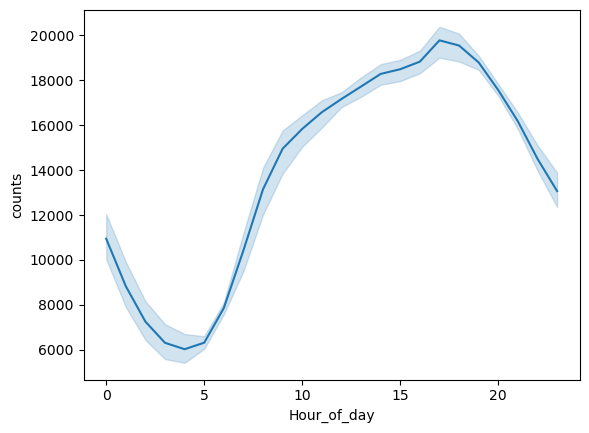

In [188]:
#plot count of incidents by hours of day for each day of week
df2 = df.groupby(['Hour_of_day', 'DAY_NUM']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='Hour_of_day', y='counts')

In [189]:
pd.crosstab(df.INCIDENT_CATEGORY,df.Day_of_week, normalize='columns')
#No day of the week is more prone to a specific type of call

Day_of_week                                          Friday    Monday  \
INCIDENT_CATEGORY                                                       
CANCELED, GOOD INTENT                              0.078484  0.079698   
FALSE ALARM FALSE CALL                             0.165432  0.164759   
FIRE                                               0.069374  0.070843   
HAZARDOUS CONDITION-NO FIRE                        0.082974  0.083757   
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  0.005298  0.004623   
RESCUE & EMS                                       0.495198  0.493224   
SERVICE CALL                                       0.103003  0.102992   
SEVERE WEATHER & NATURAL DISASTER                  0.000236  0.000104   

Day_of_week                                        Saturday    Sunday  \
INCIDENT_CATEGORY                                                       
CANCELED, GOOD INTENT                              0.077926  0.077508   
FALSE ALARM FALSE CALL                             0.157139  0.155276   
FIRE                                               0.074458  0.082765   
HAZARDOUS CONDITION-NO FIRE                        0.077159  0.076812   
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  0.004710  0.005133   
RESCUE & EMS                                       0.505695  0.501742   
SERVICE CALL                                       0.102820  0.100686   
SEVERE WEATHER & NATURAL DISASTER                  0.000093  0.000077   

Day_of_week                                        Thursday   Tuesday  \
INCIDENT_CATEGORY                                                       
CANCELED, GOOD INTENT                              0.081593  0.080012   
FALSE ALARM FALSE CALL                             0.167649  0.168809   
FIRE                                               0.071517  0.069582   
HAZARDOUS CONDITION-NO FIRE                        0.081420  0.087989   
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  0.005438  0.005009   
RESCUE & EMS                                       0.489913  0.484862   
SERVICE CALL                                       0.102324  0.103531   
SEVERE WEATHER & NATURAL DISASTER                  0.000146  0.000204   

Day_of_week                                        Wednesday  
INCIDENT_CATEGORY                                             
CANCELED, GOOD INTENT                               0.080896  
FALSE ALARM FALSE CALL                              0.171025  
FIRE                                                0.069225  
HAZARDOUS CONDITION-NO FIRE                         0.082601  
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE   0.004745  
RESCUE & EMS                                        0.488873  
SERVICE CALL                                        0.102454  
SEVERE WEATHER & NATURAL DISASTER                   0.000181

In [190]:
pd.crosstab(df.MONTH, df.INCIDENT_CATEGORY, normalize='columns')
#incident by month shows nothing inconsistent

INCIDENT_CATEGORY  CANCELED, GOOD INTENT  FALSE ALARM FALSE CALL      FIRE  \
MONTH                                                                        
1                               0.097633                0.082804  0.091313   
2                               0.082811                0.067220  0.080890   
3                               0.083080                0.072191  0.090959   
4                               0.074093                0.070304  0.082723   
5                               0.075932                0.080651  0.084757   
6                               0.077702                0.086405  0.079823   
7                               0.083698                0.097980  0.076993   
8                               0.083822                0.097497  0.070679   
9                               0.083531                0.092455  0.074847   
10                              0.084360                0.091759  0.080424   
11                              0.085457                0.082154  0.091619   
12                              0.087882                0.078579  0.094974   

INCIDENT_CATEGORY  HAZARDOUS CONDITION-NO FIRE  \
MONTH                                            
1                                     0.084227   
2                                     0.075921   
3                                     0.082056   
4                                     0.067030   
5                                     0.073311   
6                                     0.080369   
7                                     0.098903   
8                                     0.103852   
9                                     0.083413   
10                                    0.089218   
11                                    0.083230   
12                                    0.078469   

INCIDENT_CATEGORY  OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  \
MONTH                                                                  
1                                                           0.152181   
2                                                           0.244825   
3                                                           0.157485   
4                                                           0.038152   
5                                                           0.035415   
6                                                           0.042772   
7                                                           0.063644   
8                                                           0.042515   
9                                                           0.032079   
10                                                          0.020445   
11                                                          0.024465   
12                                                          0.146022   

INCIDENT_CATEGORY  RESCUE & EMS  SERVICE CALL  \
MONTH                                           
1                      0.081929      0.107124   
2                      0.073214      0.079714   
3                      0.073637      0.088371   
4                      0.077886      0.068473   
5                      0.083869      0.075793   
6                      0.087675      0.081155   
7                      0.089877      0.097683   
8                      0.089949      0.089088   
9                      0.086828      0.075851   
10                     0.087244      0.078018   
11                     0.080845      0.077610   
12                     0.087047      0.081122   

INCIDENT_CATEGORY  SEVERE WEATHER & NATURAL DISASTER  
MONTH                                                 
1                                           0.048571  
2                                           0.057143  
3                                           0.214286  
4                                           0.020000  
5                                           0.042857  
6                                           0.040000  
7                                           0.117143  
8              

<AxesSubplot: xlabel='MONTH', ylabel='counts'>

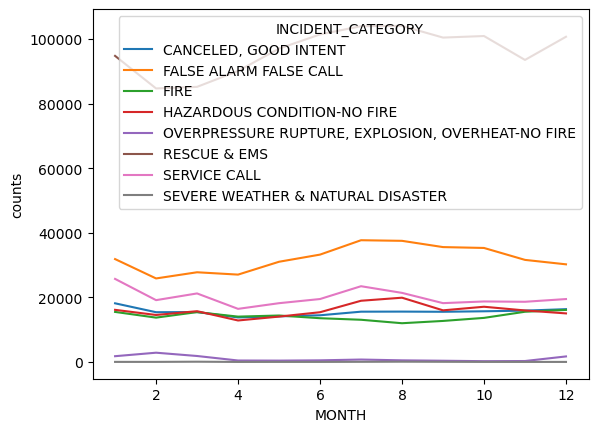

In [191]:
#Types of calls by month
df2 = df.groupby(['MONTH', 'INCIDENT_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='MONTH', y='counts', hue='INCIDENT_CATEGORY')

In [192]:
pd.crosstab(df.Hour_of_day, df.UNITS_CATEGORY, normalize='columns')
#No significant addiitonal information from this

UNITS_CATEGORY         1         2         3         4         5         6  \
Hour_of_day                                                                  
0               0.032944  0.030215  0.028136  0.030365  0.039243  0.042542   
1               0.026745  0.024690  0.023259  0.021369  0.030258  0.034117   
2               0.022061  0.020799  0.018921  0.017054  0.022745  0.027433   
3               0.019160  0.018366  0.016896  0.014565  0.018753  0.023835   
4               0.018294  0.017953  0.016096  0.013647  0.018028  0.021513   
5               0.019064  0.018221  0.017952  0.016361  0.019960  0.021436   
6               0.023607  0.022693  0.024280  0.021736  0.025335  0.023699   
7               0.031395  0.030191  0.033966  0.030926  0.031632  0.026969   
8               0.039314  0.037392  0.043878  0.042421  0.042999  0.032202   
9               0.044226  0.046307  0.051677  0.047062  0.042342  0.033595   
10              0.046727  0.049883  0.052984  0.051580  0.043676  0.036661   
11              0.049143  0.052640  0.053784  0.053763  0.044618  0.037861   
12              0.051824  0.053292  0.053671  0.052468  0.043676  0.039989   
13              0.053561  0.054279  0.057322  0.049795  0.044529  0.044061   
14              0.055262  0.055484  0.058671  0.052988  0.047031  0.045028   
15              0.055890  0.057638  0.056912  0.052917  0.047521  0.045599   
16              0.056417  0.058525  0.056430  0.057017  0.051327  0.051016   
17              0.059556  0.058872  0.055471  0.062117  0.060017  0.057400   
18              0.058116  0.059866  0.056143  0.062107  0.057280  0.060457   
19              0.055414  0.056712  0.054753  0.060322  0.058977  0.061434   
20              0.051411  0.051714  0.049928  0.057588  0.058153  0.065526   
21              0.047679  0.046452  0.044949  0.050377  0.054661  0.062895   
22              0.042935  0.041077  0.039791  0.043798  0.051327  0.056153   
23              0.039254  0.036742  0.034130  0.037658  0.045912  0.048579   

UNITS_CATEGORY  7 or more  
Hour_of_day                
0                0.038554  
1                0.031822  
2                0.028201  
3                0.024122  
4                0.023153  
5                0.023000  
6                0.022592  
7                0.028813  
8                0.034831  
9                0.040186  
10               0.042837  
11               0.046662  
12               0.047427  
13               0.049824  
14               0.054618  
15               0.053394  
16               0.053904  
17               0.059564  
18               0.055230  
19               0.054873  
20               0.050640  
21               0.049314  
22               0.044622  
23               0.041818

In [193]:
pd.crosstab(df.Hour_of_day, df.INCIDENT_CATEGORY, normalize='columns')

INCIDENT_CATEGORY  CANCELED, GOOD INTENT  FALSE ALARM FALSE CALL      FIRE  \
Hour_of_day                                                                  
0                               0.032204                0.040136  0.032041   
1                               0.023357                0.035596  0.024495   
2                               0.017618                0.030732  0.020746   
3                               0.013961                0.027357  0.017715   
4                               0.013257                0.026075  0.016130   
5                               0.014849                0.025953  0.015853   
6                               0.019538                0.030914  0.019113   
7                               0.028520                0.038649  0.023670   
8                               0.037576                0.037110  0.030644   
9                               0.043331                0.044332  0.037359   
10                              0.046859                0.048435  0.041462   
11                              0.050059                0.049717  0.046785   
12                              0.051140                0.046438  0.051431   
13                              0.051699                0.049267  0.053076   
14                              0.053307                0.052431  0.054467   
15                              0.054388                0.051565  0.056283   
16                              0.057652                0.050351  0.059160   
17                              0.061137                0.048492  0.066269   
18                              0.063531                0.048861  0.069512   
19                              0.062998                0.047161  0.067625   
20                              0.058637                0.044759  0.061795   
21                              0.055878                0.041329  0.052993   
22                              0.047493                0.038035  0.044569   
23                              0.041013                0.046303  0.036810   

INCIDENT_CATEGORY  HAZARDOUS CONDITION-NO FIRE  \
Hour_of_day                                      
0                                     0.026913   
1                                     0.018889   
2                                     0.013491   
3                                     0.010849   
4                                     0.010269   
5                                     0.012525   
6                                     0.018831   
7                                     0.029873   
8                                     0.041897   
9                                     0.049932   
10                                    0.054255   
11                                    0.056150   
12                                    0.054641   
13                                    0.053915   
14                                    0.056192   
15                                    0.054359   
16                                    0.058964   
17                                    0.064994   
18                                    0.065156   
19                                    0.061533   
20                                    0.057502   
21                                    0.050464   
22                                    0.043343   
23                                    0.035063   

INCIDENT_CATEGORY  OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  \
Hour_of_day                                                            
0                                                           0.029085   
1                                                           0.024038   
2                                                           0.017622   
3                                                           0.016253   
4                                                           0.015483   
5                                                           0.019589   
6                                                           0.027802   
7                     

<AxesSubplot: xlabel='Hour_of_day', ylabel='counts'>

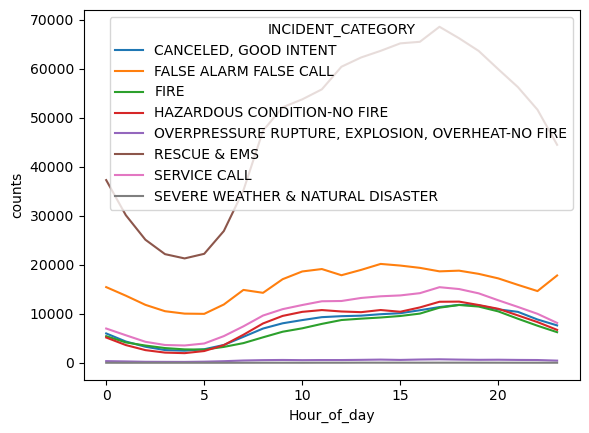

In [194]:
#Types of calls by hour of day
df2 = df.groupby(['Hour_of_day', 'INCIDENT_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='Hour_of_day', y='counts', hue='INCIDENT_CATEGORY')
#all calls escalate as the day progresses but Resuce & EMS more than others

In [195]:
pd.crosstab(df.LEVEL_CATEGORY, df.INCIDENT_CATEGORY, normalize='columns')
#since the majority of the level category is at a 1 there is no much insight here

INCIDENT_CATEGORY  CANCELED, GOOD INTENT  FALSE ALARM FALSE CALL      FIRE  \
LEVEL_CATEGORY                                                               
0                               0.001463                0.001724  0.000955   
1                               0.998457                0.998237  0.944366   
2                               0.000005                0.000000  0.003437   
3                               0.000000                0.000000  0.000873   
4                               0.000000                0.000000  0.000354   
5                               0.000000                0.000000  0.000195   
6                               0.000000                0.000000  0.000024   
7                               0.000075                0.000039  0.049798   

INCIDENT_CATEGORY  HAZARDOUS CONDITION-NO FIRE  \
LEVEL_CATEGORY                                   
0                                     0.000799   
1                                     0.997343   
2                                     0.000047   
3                                     0.000005   
4                                     0.000000   
5                                     0.000000   
6                                     0.000000   
7                                     0.001806   

INCIDENT_CATEGORY  OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  \
LEVEL_CATEGORY                                                         
0                                                           0.000684   
1                                                           0.996835   
2                                                           0.000171   
3                                                           0.000000   
4                                                           0.000000   
5                                                           0.000000   
6                                                           0.000000   
7                                                           0.002310   

INCIDENT_CATEGORY  RESCUE & EMS  SERVICE CALL  \
LEVEL_CATEGORY                                  
0                      0.003299      0.000933   
1                      0.996565      0.998958   
2                      0.000003      0.000000   
3                      0.000000      0.000004   
4                      0.000000      0.000000   
5                      0.000000      0.000000   
6                      0.000000      0.000000   
7                      0.000133      0.000104   

INCIDENT_CATEGORY  SEVERE WEATHER & NATURAL DISASTER  
LEVEL_CATEGORY                                        
0                                           0.002857  
1                                           0.985714  
2                                           0.000000  
3                                           0.000000  
4                                           0.000000  
5                                           0.000000  
6                                           0.000000  
7                                           0.011429

In [196]:
pd.crosstab(df.INCIDENT_LENGTH,df.Day_of_week,normalize='columns')
#No day of the week is more prone to a longer call

Day_of_week        Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
INCIDENT_LENGTH                                                               
1-2hr            0.045545  0.044690  0.045681  0.044020  0.045479  0.044559   
15min-30min      0.413949  0.411747  0.410920  0.404821  0.412032  0.413586   
2-3hr            0.004326  0.003731  0.004026  0.003707  0.004114  0.003988   
30min-45min      0.099776  0.097724  0.094308  0.091401  0.098407  0.097990   
3hr>             0.002555  0.002310  0.002268  0.002113  0.002364  0.002913   
45min-1hr        0.050173  0.050331  0.048078  0.047046  0.049962  0.049992   
<=15min          0.383677  0.389468  0.394717  0.406891  0.387642  0.386971   

Day_of_week      Wednesday  
INCIDENT_LENGTH             
1-2hr             0.044949  
15min-30min       0.412403  
2-3hr             0.003835  
30min-45min       0.098201  
3hr>              0.002461  
45min-1hr         0.050170  
<=15min           0.387982

<AxesSubplot: xlabel='Day_of_week', ylabel='counts'>

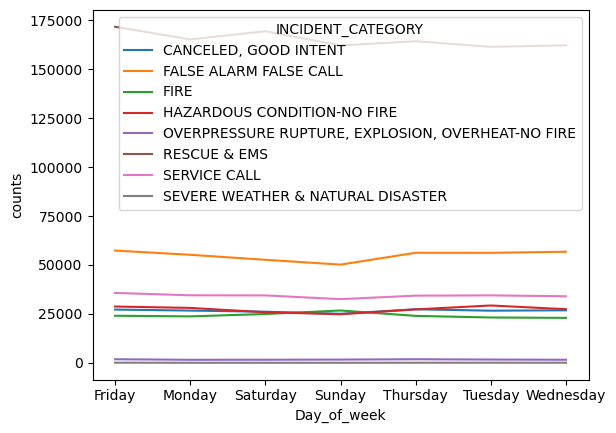

In [199]:
#Types of incidents per day of week
df2 = df.groupby(['Day_of_week', 'INCIDENT_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='Day_of_week', y='counts', hue='INCIDENT_CATEGORY')
#No insights here - consistent

In [200]:
pd.crosstab(df.Hour_of_day,df.LEVEL_CATEGORY,normalize='columns')

LEVEL_CATEGORY         0         1         2         3         4         5  \
Hour_of_day                                                                  
0               0.020570  0.032748  0.030100  0.053333  0.033333  0.060606   
1               0.021891  0.026397  0.060201  0.020000  0.000000  0.000000   
2               0.024533  0.021661  0.043478  0.026667  0.066667  0.000000   
3               0.020947  0.018843  0.043478  0.053333  0.033333  0.060606   
4               0.020947  0.017987  0.036789  0.060000  0.033333  0.030303   
5               0.021513  0.018858  0.055184  0.053333  0.050000  0.060606   
6               0.026043  0.023488  0.023411  0.026667  0.033333  0.060606   
7               0.032648  0.031197  0.038462  0.026667  0.033333  0.060606   
8               0.045103  0.039328  0.030100  0.020000  0.016667  0.000000   
9               0.045103  0.044738  0.033445  0.033333  0.066667  0.000000   
10              0.041706  0.047382  0.040134  0.053333  0.016667  0.030303   
11              0.054916  0.049561  0.050167  0.046667  0.016667  0.000000   
12              0.053406  0.051333  0.038462  0.066667  0.066667  0.030303   
13              0.060955  0.052965  0.048495  0.040000  0.050000  0.030303   
14              0.054727  0.054658  0.058528  0.013333  0.083333  0.090909   
15              0.064918  0.055262  0.050167  0.080000  0.050000  0.090909   
16              0.054727  0.056315  0.045151  0.046667  0.016667  0.030303   
17              0.054916  0.059166  0.043478  0.040000  0.050000  0.030303   
18              0.060766  0.058469  0.036789  0.033333  0.050000  0.121212   
19              0.060200  0.056197  0.048495  0.080000  0.033333  0.030303   
20              0.047934  0.052547  0.031773  0.053333  0.050000  0.060606   
21              0.041329  0.048399  0.038462  0.020000  0.016667  0.030303   
22              0.036988  0.043401  0.035117  0.026667  0.033333  0.060606   
23              0.033214  0.039100  0.040134  0.026667  0.100000  0.030303   

LEVEL_CATEGORY     6         7  
Hour_of_day                     
0               0.00  0.036980  
1               0.50  0.031997  
2               0.00  0.029119  
3               0.00  0.024911  
4               0.25  0.025797  
5               0.00  0.024358  
6               0.00  0.026683  
7               0.00  0.027347  
8               0.00  0.035319  
9               0.00  0.040412  
10              0.00  0.044176  
11              0.00  0.050376  
12              0.00  0.049712  
13              0.00  0.055137  
14              0.00  0.057905  
15              0.00  0.057795  
16              0.25  0.055691  
17              0.00  0.055580  
18              0.00  0.052812  
19              0.00  0.052923  
20              0.00  0.045948  
21              0.00  0.042626  
22              0.00  0.040301  
23              0.00  0.036094

In [121]:
pd.crosstab(df.MONTH,df.INCIDENT_LENGTH,normalize='columns')

INCIDENT_LENGTH     1-2hr  15min-30min     2-3hr  30min-45min      3hr>  \
MONTH                                                                     
1                0.084843     0.090078  0.081268     0.088768  0.080239   
2                0.074322     0.077021  0.075555     0.075836  0.071617   
3                0.079943     0.078202  0.085471     0.077962  0.085694   
4                0.091651     0.072250  0.087627     0.074962  0.063699   
5                0.080276     0.079575  0.073292     0.082095  0.073729   
6                0.080333     0.083360  0.088381     0.085213  0.082175   
7                0.087302     0.090659  0.098620     0.089015  0.095900   
8                0.085593     0.087866  0.089782     0.087414  0.129861   
9                0.082194     0.083997  0.079759     0.084375  0.083583   
10               0.084140     0.086482  0.078896     0.085804  0.076192   
11               0.081311     0.082576  0.078465     0.082364  0.076544   
12               0.088091     0.087934  0.082884     0.086192  0.080767   

INCIDENT_LENGTH  45min-1hr   <=15min  
MONTH                                 
1                 0.085044  0.084221  
2                 0.073914  0.073640  
3                 0.075211  0.077917  
4                 0.078878  0.074487  
5                 0.083012  0.081755  
6                 0.084897  0.086200  
7                 0.088365  0.093004  
8                 0.086731  0.093919  
9                 0.085304  0.086432  
10                0.086860  0.086133  
11                0.082752  0.080797  
12                0.089031  0.081494

<AxesSubplot: xlabel='MONTH', ylabel='counts'>

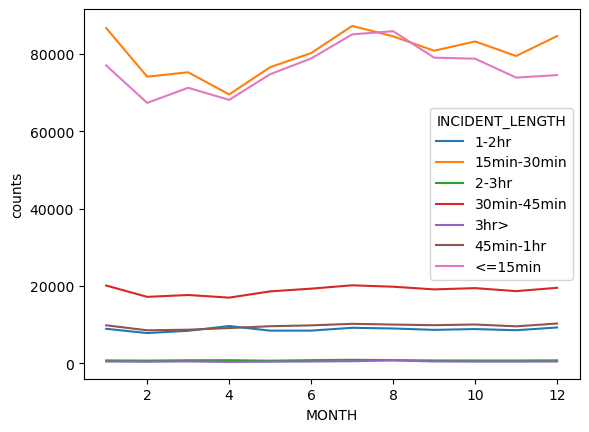

In [205]:
#incident length compared to month
df2 = df.groupby(['MONTH', 'INCIDENT_LENGTH']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='MONTH', y='counts', hue='INCIDENT_LENGTH')
#No insights here - consistent

In [116]:
pd.crosstab(df.Hour_of_day,df.INCIDENT_LENGTH,normalize='columns')

INCIDENT_LENGTH     1-2hr  15min-30min     2-3hr  30min-45min      3hr>  \
Hour_of_day                                                               
0                0.029237     0.030869  0.028993     0.025971  0.031146   
1                0.025296     0.025056  0.024359     0.020427  0.028330   
2                0.022856     0.020949  0.026730     0.016894  0.021643   
3                0.022096     0.018472  0.024035     0.014935  0.023051   
4                0.022875     0.017527  0.026945     0.014997  0.025515   
5                0.026702     0.019110  0.028670     0.015288  0.035193   
6                0.031554     0.024275  0.033628     0.020158  0.032377   
7                0.038676     0.032585  0.039340     0.030563  0.036776   
8                0.049842     0.040273  0.046346     0.056172  0.046630   
9                0.050469     0.045192  0.055077     0.055127  0.097132   
10               0.047089     0.047239  0.051304     0.061827  0.057364   
11               0.049937     0.049567  0.053999     0.058369  0.059828   
12               0.056727     0.050995  0.061867     0.050738  0.057012   
13               0.053745     0.052497  0.053891     0.051126  0.055428   
14               0.051400     0.055449  0.052705     0.052630  0.050677   
15               0.050336     0.056663  0.048933     0.053124  0.053317   
16               0.048902     0.058570  0.048071     0.055030  0.042055   
17               0.052530     0.060935  0.048933     0.079872  0.044167   
18               0.047981     0.059829  0.051089     0.063410  0.049446   
19               0.048162     0.056688  0.045592     0.049582  0.039592   
20               0.049311     0.051454  0.043221     0.044294  0.032553   
21               0.048029     0.047279  0.038263     0.040518  0.029034   
22               0.041838     0.042119  0.037077     0.036636  0.023755   
23               0.034412     0.036406  0.030933     0.032314  0.027978   

INCIDENT_LENGTH  45min-1hr   <=15min  
Hour_of_day                           
0                 0.026394  0.037632  
1                 0.021360  0.030109  
2                 0.018463  0.023915  
3                 0.016275  0.020169  
4                 0.017287  0.018716  
5                 0.018342  0.018541  
6                 0.023817  0.022406  
7                 0.032499  0.028726  
8                 0.052536  0.031147  
9                 0.055399  0.039198  
10                0.054845  0.042871  
11                0.053574  0.046748  
12                0.056584  0.050399  
13                0.057587  0.053275  
14                0.053073  0.054980  
15                0.053107  0.055316  
16                0.050893  0.055943  
17                0.066408  0.052144  
18                0.054223  0.057630  
19                0.048091  0.059466  
20                0.048377  0.056755  
21                0.046959  0.051866  
22                0.040239  0.047115  
23                0.033667  0.044932

<AxesSubplot: xlabel='Hour_of_day', ylabel='counts'>

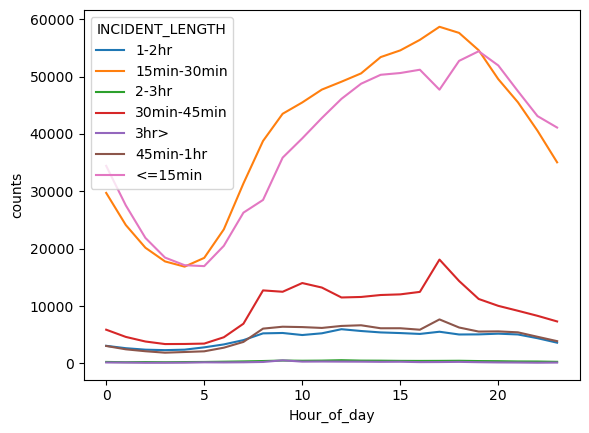

In [212]:
#incident length compared to hour of day
df2 = df.groupby(['Hour_of_day', 'INCIDENT_LENGTH']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='Hour_of_day', y='counts', hue='INCIDENT_LENGTH')
#No insights here - consistently increase as day progresses

In [211]:
pd.crosstab(df.UNITS_CATEGORY,df.MONTH, normalize='columns')

MONTH                 1         2         3         4         5         6   \
UNITS_CATEGORY                                                               
1               0.595126  0.595570  0.600858  0.625268  0.628135  0.635805   
2               0.155209  0.160989  0.157136  0.157013  0.160859  0.161599   
3               0.091067  0.086255  0.084656  0.079130  0.078976  0.077726   
4               0.047981  0.046864  0.046349  0.040650  0.038914  0.037740   
5               0.049286  0.049934  0.050072  0.044154  0.041848  0.038815   
6               0.052366  0.051444  0.051238  0.045053  0.042789  0.040068   
7 or more       0.008965  0.008944  0.009690  0.008731  0.008479  0.008247   

MONTH                 7         8         9         10        11        12  
UNITS_CATEGORY                                                              
1               0.631334  0.628306  0.617259  0.612642  0.611204  0.610304  
2               0.161865  0.168531  0.169902  0.171057  0.165553  0.157778  
3               0.080375  0.080891  0.085937  0.086414  0.084085  0.084261  
4               0.037702  0.037940  0.040645  0.042217  0.043192  0.043538  
5               0.039787  0.038381  0.040886  0.040814  0.043840  0.046645  
6               0.041225  0.038490  0.037657  0.039355  0.043913  0.048279  
7 or more       0.007712  0.007461  0.007715  0.007500  0.008213  0.009195

<AxesSubplot: xlabel='MONTH', ylabel='counts'>

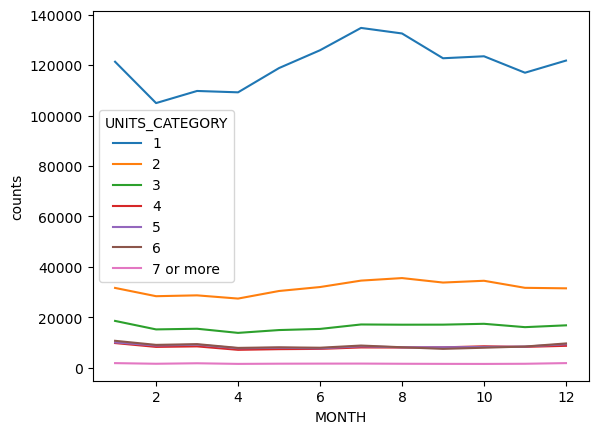

In [215]:
#units based on month
df2 = df.groupby(['MONTH', 'UNITS_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='MONTH', y='counts', hue='UNITS_CATEGORY')

In [216]:
pd.crosstab(df.UNITS_CATEGORY,df.Day_of_week, normalize='columns')
#No day of the week is more prone to a higher units need

Day_of_week       Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
UNITS_CATEGORY                                                               
1               0.619908  0.617429  0.622590  0.613774  0.613461  0.612539   
2               0.161894  0.159835  0.157133  0.162068  0.166972  0.163860   
3               0.085800  0.084058  0.078231  0.075119  0.085519  0.087707   
4               0.041496  0.042935  0.040814  0.040942  0.041648  0.042868   
5               0.041421  0.043633  0.045320  0.047647  0.042193  0.042754   
6               0.041300  0.043633  0.047257  0.051493  0.041970  0.042238   
7 or more       0.008181  0.008476  0.008655  0.008958  0.008237  0.008034   

Day_of_week     Wednesday  
UNITS_CATEGORY             
1                0.613841  
2                0.165163  
3                0.086533  
4                0.042524  
5                0.042174  
6                0.041635  
7 or more        0.008131

In [217]:
pd.crosstab(df.LEVEL_CATEGORY,df.MONTH, normalize='columns')

MONTH                 1         2         3         4         5         6   \
LEVEL_CATEGORY                                                               
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1               0.995336  0.995443  0.994761  0.995403  0.995687  0.995818   
2               0.000348  0.000250  0.000400  0.000286  0.000206  0.000237   
3               0.000093  0.000085  0.000088  0.000092  0.000063  0.000051   
4               0.000039  0.000023  0.000044  0.000029  0.000016  0.000015   
5               0.000039  0.000006  0.000027  0.000017  0.000011  0.000020   
6               0.000000  0.000000  0.000000  0.000006  0.000000  0.000000   
7               0.004144  0.004194  0.004681  0.004168  0.004017  0.003858   

MONTH                 7         8         9         10        11        12  
LEVEL_CATEGORY                                                              
0               0.000000  0.003550  0.005427  0.005313  0.005439  0.006810  
1               0.996182  0.993084  0.990886  0.991220  0.990345  0.988405  
2               0.000248  0.000137  0.000196  0.000198  0.000240  0.000336  
3               0.000037  0.000038  0.000045  0.000020  0.000094  0.000075  
4               0.000033  0.000028  0.000015  0.000010  0.000031  0.000025  
5               0.000000  0.000000  0.000020  0.000015  0.000010  0.000005  
6               0.000000  0.000000  0.000000  0.000005  0.000000  0.000010  
7               0.003500  0.003162  0.003410  0.003219  0.003840  0.004334

In [218]:
pd.crosstab(df.LEVEL_CATEGORY,df.Day_of_week, normalize='columns')

Day_of_week       Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
LEVEL_CATEGORY                                                               
0               0.002223  0.002707  0.002128  0.001891  0.001890  0.002201   
1               0.993601  0.993076  0.993604  0.993719  0.993972  0.993711   
2               0.000254  0.000284  0.000257  0.000235  0.000233  0.000279   
3               0.000046  0.000104  0.000042  0.000059  0.000057  0.000081   
4               0.000023  0.000021  0.000024  0.000025  0.000027  0.000024   
5               0.000012  0.000009  0.000021  0.000012  0.000018  0.000009   
6               0.000000  0.000000  0.000003  0.000000  0.000003  0.000000   
7               0.003841  0.003799  0.003922  0.004060  0.003801  0.003694   

Day_of_week     Wednesday  
LEVEL_CATEGORY             
0                0.002802  
1                0.992926  
2                0.000247  
3                0.000060  
4                0.000036  
5                0.000018  
6                0.000006  
7                0.003904

In [102]:
pd.crosstab(df.UNITS_CATEGORY,df.INCIDENT_LENGTH, normalize='columns')
#We do see relationships between length of a call and units needed

INCIDENT_LENGTH     1-2hr  15min-30min     2-3hr  30min-45min      3hr>  \
UNITS_CATEGORY                                                            
1                0.716576     0.584450  0.312675     0.622357  0.235263   
2                0.094652     0.147812  0.125135     0.128126  0.177723   
3                0.038315     0.097931  0.036107     0.076903  0.030442   
4                0.026217     0.051576  0.031903     0.046124  0.027098   
5                0.037403     0.056326  0.053244     0.056746  0.032905   
6                0.042407     0.057630  0.067148     0.061262  0.043287   
7 or more        0.044430     0.004276  0.373787     0.008482  0.453282   

INCIDENT_LENGTH  45min-1hr   <=15min  
UNITS_CATEGORY                        
1                 0.728358  0.627948  
2                 0.096607  0.202672  
3                 0.050098  0.079739  
4                 0.031894  0.033910  
5                 0.039893  0.028007  
6                 0.041925  0.026033  
7 or more         0.011225  0.001692

<AxesSubplot: xlabel='UNITS_CATEGORY', ylabel='counts'>

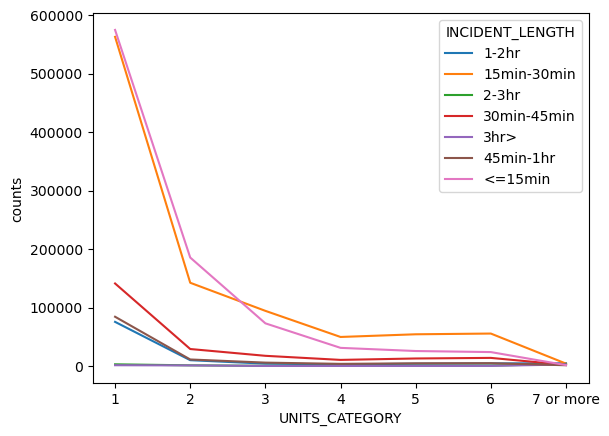

In [222]:
df2 = df.groupby(['INCIDENT_LENGTH', 'UNITS_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='UNITS_CATEGORY', y='counts', hue='INCIDENT_LENGTH')

In [103]:
pd.crosstab(df.UNITS_CATEGORY,df.INCIDENT_CATEGORY, normalize='columns')

INCIDENT_CATEGORY  CANCELED, GOOD INTENT  FALSE ALARM FALSE CALL      FIRE  \
UNITS_CATEGORY                                                               
1                               0.148342                0.277725  0.166289   
2                               0.265647                0.392649  0.249549   
3                               0.188570                0.205055  0.093641   
4                               0.140969                0.046365  0.063947   
5                               0.132703                0.039390  0.124539   
6                               0.114272                0.036813  0.230466   
7 or more                       0.009498                0.002002  0.071569   

INCIDENT_CATEGORY  HAZARDOUS CONDITION-NO FIRE  \
UNITS_CATEGORY                                   
1                                     0.205841   
2                                     0.180390   
3                                     0.194715   
4                                     0.155601   
5                                     0.152959   
6                                     0.098559   
7 or more                             0.011935   

INCIDENT_CATEGORY  OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  \
UNITS_CATEGORY                                                         
1                                                           0.091702   
2                                                           0.218135   
3                                                           0.163559   
4                                                           0.147562   
5                                                           0.168007   
6                                                           0.199572   
7 or more                                                   0.011463   

INCIDENT_CATEGORY  RESCUE & EMS  SERVICE CALL  \
UNITS_CATEGORY                                  
1                      0.903203      0.809467   
2                      0.066271      0.098074   
3                      0.015907      0.031605   
4                      0.006905      0.015111   
5                      0.004602      0.018394   
6                      0.001527      0.024560   
7 or more              0.001586      0.002787   

INCIDENT_CATEGORY  SEVERE WEATHER & NATURAL DISASTER  
UNITS_CATEGORY                                        
1                                           0.665714  
2                                           0.214286  
3                                           0.037143  
4                                           0.020000  
5                                           0.014286  
6                                           0.020000  
7 or more                                   0.028571

<AxesSubplot: xlabel='UNITS_CATEGORY', ylabel='counts'>

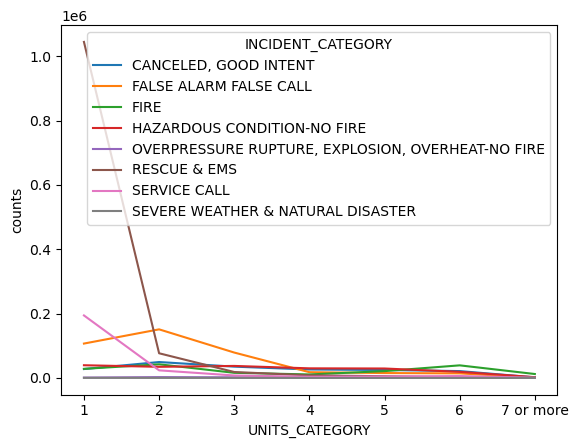

In [225]:
df2 = df.groupby(['INCIDENT_CATEGORY', 'UNITS_CATEGORY']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='UNITS_CATEGORY', y='counts', hue='INCIDENT_CATEGORY')
#Since most of the calls are rescue this spike is on par

In [226]:
pd.crosstab(df.INCIDENT_LENGTH,df.INCIDENT_CATEGORY, normalize='columns')

INCIDENT_CATEGORY  CANCELED, GOOD INTENT  FALSE ALARM FALSE CALL      FIRE  \
INCIDENT_LENGTH                                                              
1-2hr                           0.011864                0.005229  0.052975   
15min-30min                     0.423277                0.353972  0.419134   
2-3hr                           0.001565                0.000260  0.021848   
30min-45min                     0.061105                0.046997  0.105786   
3hr>                            0.002587                0.000348  0.013848   
45min-1hr                       0.016801                0.011388  0.041126   
<=15min                         0.482801                0.581806  0.345283   

INCIDENT_CATEGORY  HAZARDOUS CONDITION-NO FIRE  \
INCIDENT_LENGTH                                  
1-2hr                                 0.036796   
15min-30min                           0.508643   
2-3hr                                 0.007053   
30min-45min                           0.117891   
3hr>                                  0.005847   
45min-1hr                             0.040628   
<=15min                               0.283140   

INCIDENT_CATEGORY  OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE  \
INCIDENT_LENGTH                                                        
1-2hr                                                       0.056031   
15min-30min                                                 0.438922   
2-3hr                                                       0.011548   
30min-45min                                                 0.091702   
3hr>                                                        0.008298   
45min-1hr                                                   0.042857   
<=15min                                                     0.350642   

INCIDENT_CATEGORY  RESCUE & EMS  SERVICE CALL  \
INCIDENT_LENGTH                                 
1-2hr                  0.069800      0.015244   
15min-30min            0.400634      0.461666   
2-3hr                  0.002812      0.001825   
30min-45min            0.118170      0.079009   
3hr>                   0.000628      0.003216   
45min-1hr              0.075675      0.022194   
<=15min                0.332282      0.416845   

INCIDENT_CATEGORY  SEVERE WEATHER & NATURAL DISASTER  
INCIDENT_LENGTH                                       
1-2hr                                       0.042857  
15min-30min                                 0.391429  
2-3hr                                       0.014286  
30min-45min                                 0.105714  
3hr>                                        0.011429  
45min-1hr                                   0.045714  
<=15min                                     0.388571

<AxesSubplot: xlabel='INCIDENT_CATEGORY', ylabel='counts'>

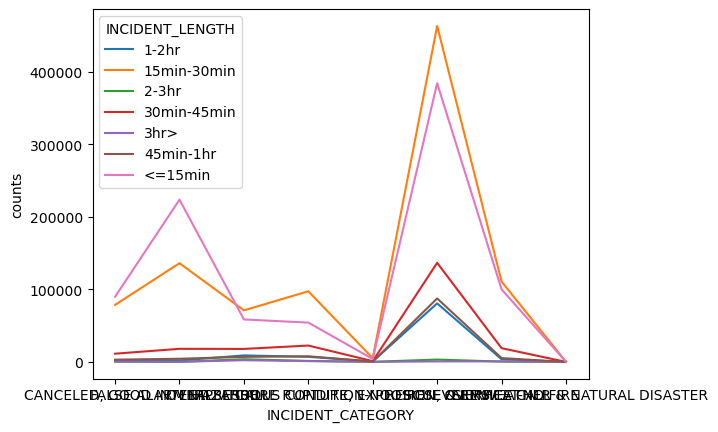

In [230]:
df2 = df.groupby(['INCIDENT_CATEGORY', 'INCIDENT_LENGTH']).size().reset_index(name='counts')
sns.lineplot(data=df2, x='INCIDENT_CATEGORY', y='counts', hue='INCIDENT_LENGTH')

In [228]:
pd.crosstab(df.INCIDENT_LENGTH,df.LEVEL_CATEGORY, normalize='columns')

LEVEL_CATEGORY          0         1         2    3    4    5    6         7
INCIDENT_LENGTH                                                            
1-2hr            0.097188  0.043528  0.023411  0.0  0.0  0.0  0.0  0.395261
15min-30min      0.383280  0.413170  0.000000  0.0  0.0  0.0  0.0  0.009079
2-3hr            0.006605  0.002716  0.155518  0.0  0.0  0.0  0.0  0.313884
30min-45min      0.119268  0.097028  0.001672  0.0  0.0  0.0  0.0  0.051705
3hr>             0.006416  0.001525  0.817726  1.0  1.0  1.0  1.0  0.151461
45min-1hr        0.092470  0.049215  0.001672  0.0  0.0  0.0  0.0  0.078167
<=15min          0.294773  0.392818  0.000000  0.0  0.0  0.0  0.0  0.000443

In [229]:
pd.crosstab(df.UNITS_CATEGORY,df.LEVEL_CATEGORY, normalize='columns')

LEVEL_CATEGORY         0         1         2    3    4    5    6         7
UNITS_CATEGORY                                                            
1               0.741083  0.618589  0.000000  0.0  0.0  0.0  0.0  0.000443
2               0.156633  0.163114  0.000000  0.0  0.0  0.0  0.0  0.000554
3               0.047179  0.083759  0.000000  0.0  0.0  0.0  0.0  0.001218
4               0.021325  0.042070  0.000000  0.0  0.0  0.0  0.0  0.011736
5               0.016984  0.043621  0.000000  0.0  0.0  0.0  0.0  0.048162
6               0.012833  0.043930  0.001672  0.0  0.0  0.0  0.0  0.128764
7 or more       0.003963  0.004918  0.998328  1.0  1.0  1.0  1.0  0.809123